# **Analysis**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, theme, element_blank
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.stats.diagnostic as ssd
import  statsmodels.stats.outliers_influence as oi
import statsmodels.stats.anova as av
import statsmodels.stats.oneway as ow
from statsmodels.tsa.stattools import adfuller
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

 **Read File**

In [66]:
bab = pd.read_csv("cleanning.ipynb (cbab).csv")

In [67]:
ba1=np.log(bab[["bwt","gestation","age","height","weight"]])

In [68]:
ba2=bab[["parity","smoke"]]

In [69]:
bab=pd.concat([ba1,ba2],axis=1)

In [70]:
bab.head()

bwt  gestation       age    height    weight  parity  smoke
0  4.787492   5.648974  3.295837  4.127134  4.605170       0      0
1  4.727388   5.641907  3.496508  4.158883  4.905275       0      0
2  4.852030   5.631212  3.332205  4.158883  4.744932       0      1
3  4.812184   5.622575  3.583519  4.234107  5.247024       0      0
4  4.682131   5.641907  3.135494  4.204693  4.828314       0      1

**Explore Data**

In [71]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   float64
 1   gestation  1236 non-null   float64
 2   age        1236 non-null   float64
 3   height     1236 non-null   float64
 4   weight     1236 non-null   float64
 5   parity     1236 non-null   int64  
 6   smoke      1236 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 67.7 KB


In [72]:
bab.describe()

bwt    gestation          age       height       weight  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean      4.771633     5.630639     3.283400     4.158885     4.844823   
std       0.160172     0.059443     0.207776     0.039359     0.151909   
min       4.007333     4.997212     2.708050     3.970292     4.465908   
25%       4.689044     5.605802     3.135494     4.127134     4.744932   
50%       4.787492     5.634790     3.258097     4.158883     4.828314   
75%       4.875197     5.662960     3.433987     4.189655     4.927254   
max       5.170484     5.866468     3.806662     4.276666     5.521461   

            parity        smoke  
count  1236.000000  1236.000000  
mean      0.254854     0.391586  
std       0.435956     0.488302  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

**change type for column smoke**

In [73]:
bab['smoke'].astype('int')

0       0
1       0
2       1
3       0
4       1
       ..
1231    0
1232    0
1233    1
1234    0
1235    0
Name: smoke, Length: 1236, dtype: int32

In [74]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   float64
 1   gestation  1236 non-null   float64
 2   age        1236 non-null   float64
 3   height     1236 non-null   float64
 4   weight     1236 non-null   float64
 5   parity     1236 non-null   int64  
 6   smoke      1236 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 67.7 KB


**multicollinearity  test
if more than 10 so there multicollinearity,
if less than 10 so there non multicollinearity**

In [75]:
x=bab[['bwt', 'gestation', 'parity', 'age', 'height', 'weight','smoke']]

In [76]:
vif = [oi.variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

[1157.8078523648064,
 6459.0755962720605,
 1.573709336525281,
 291.48202863320165,
 7457.291403567023,
 1338.0145200029037,
 1.7717211734026819]

# **Exploratry Analysis **

**Heatmap to see correlation 
DarkRed is perfect  positive correlation 
blue is negitive perfect correlation**

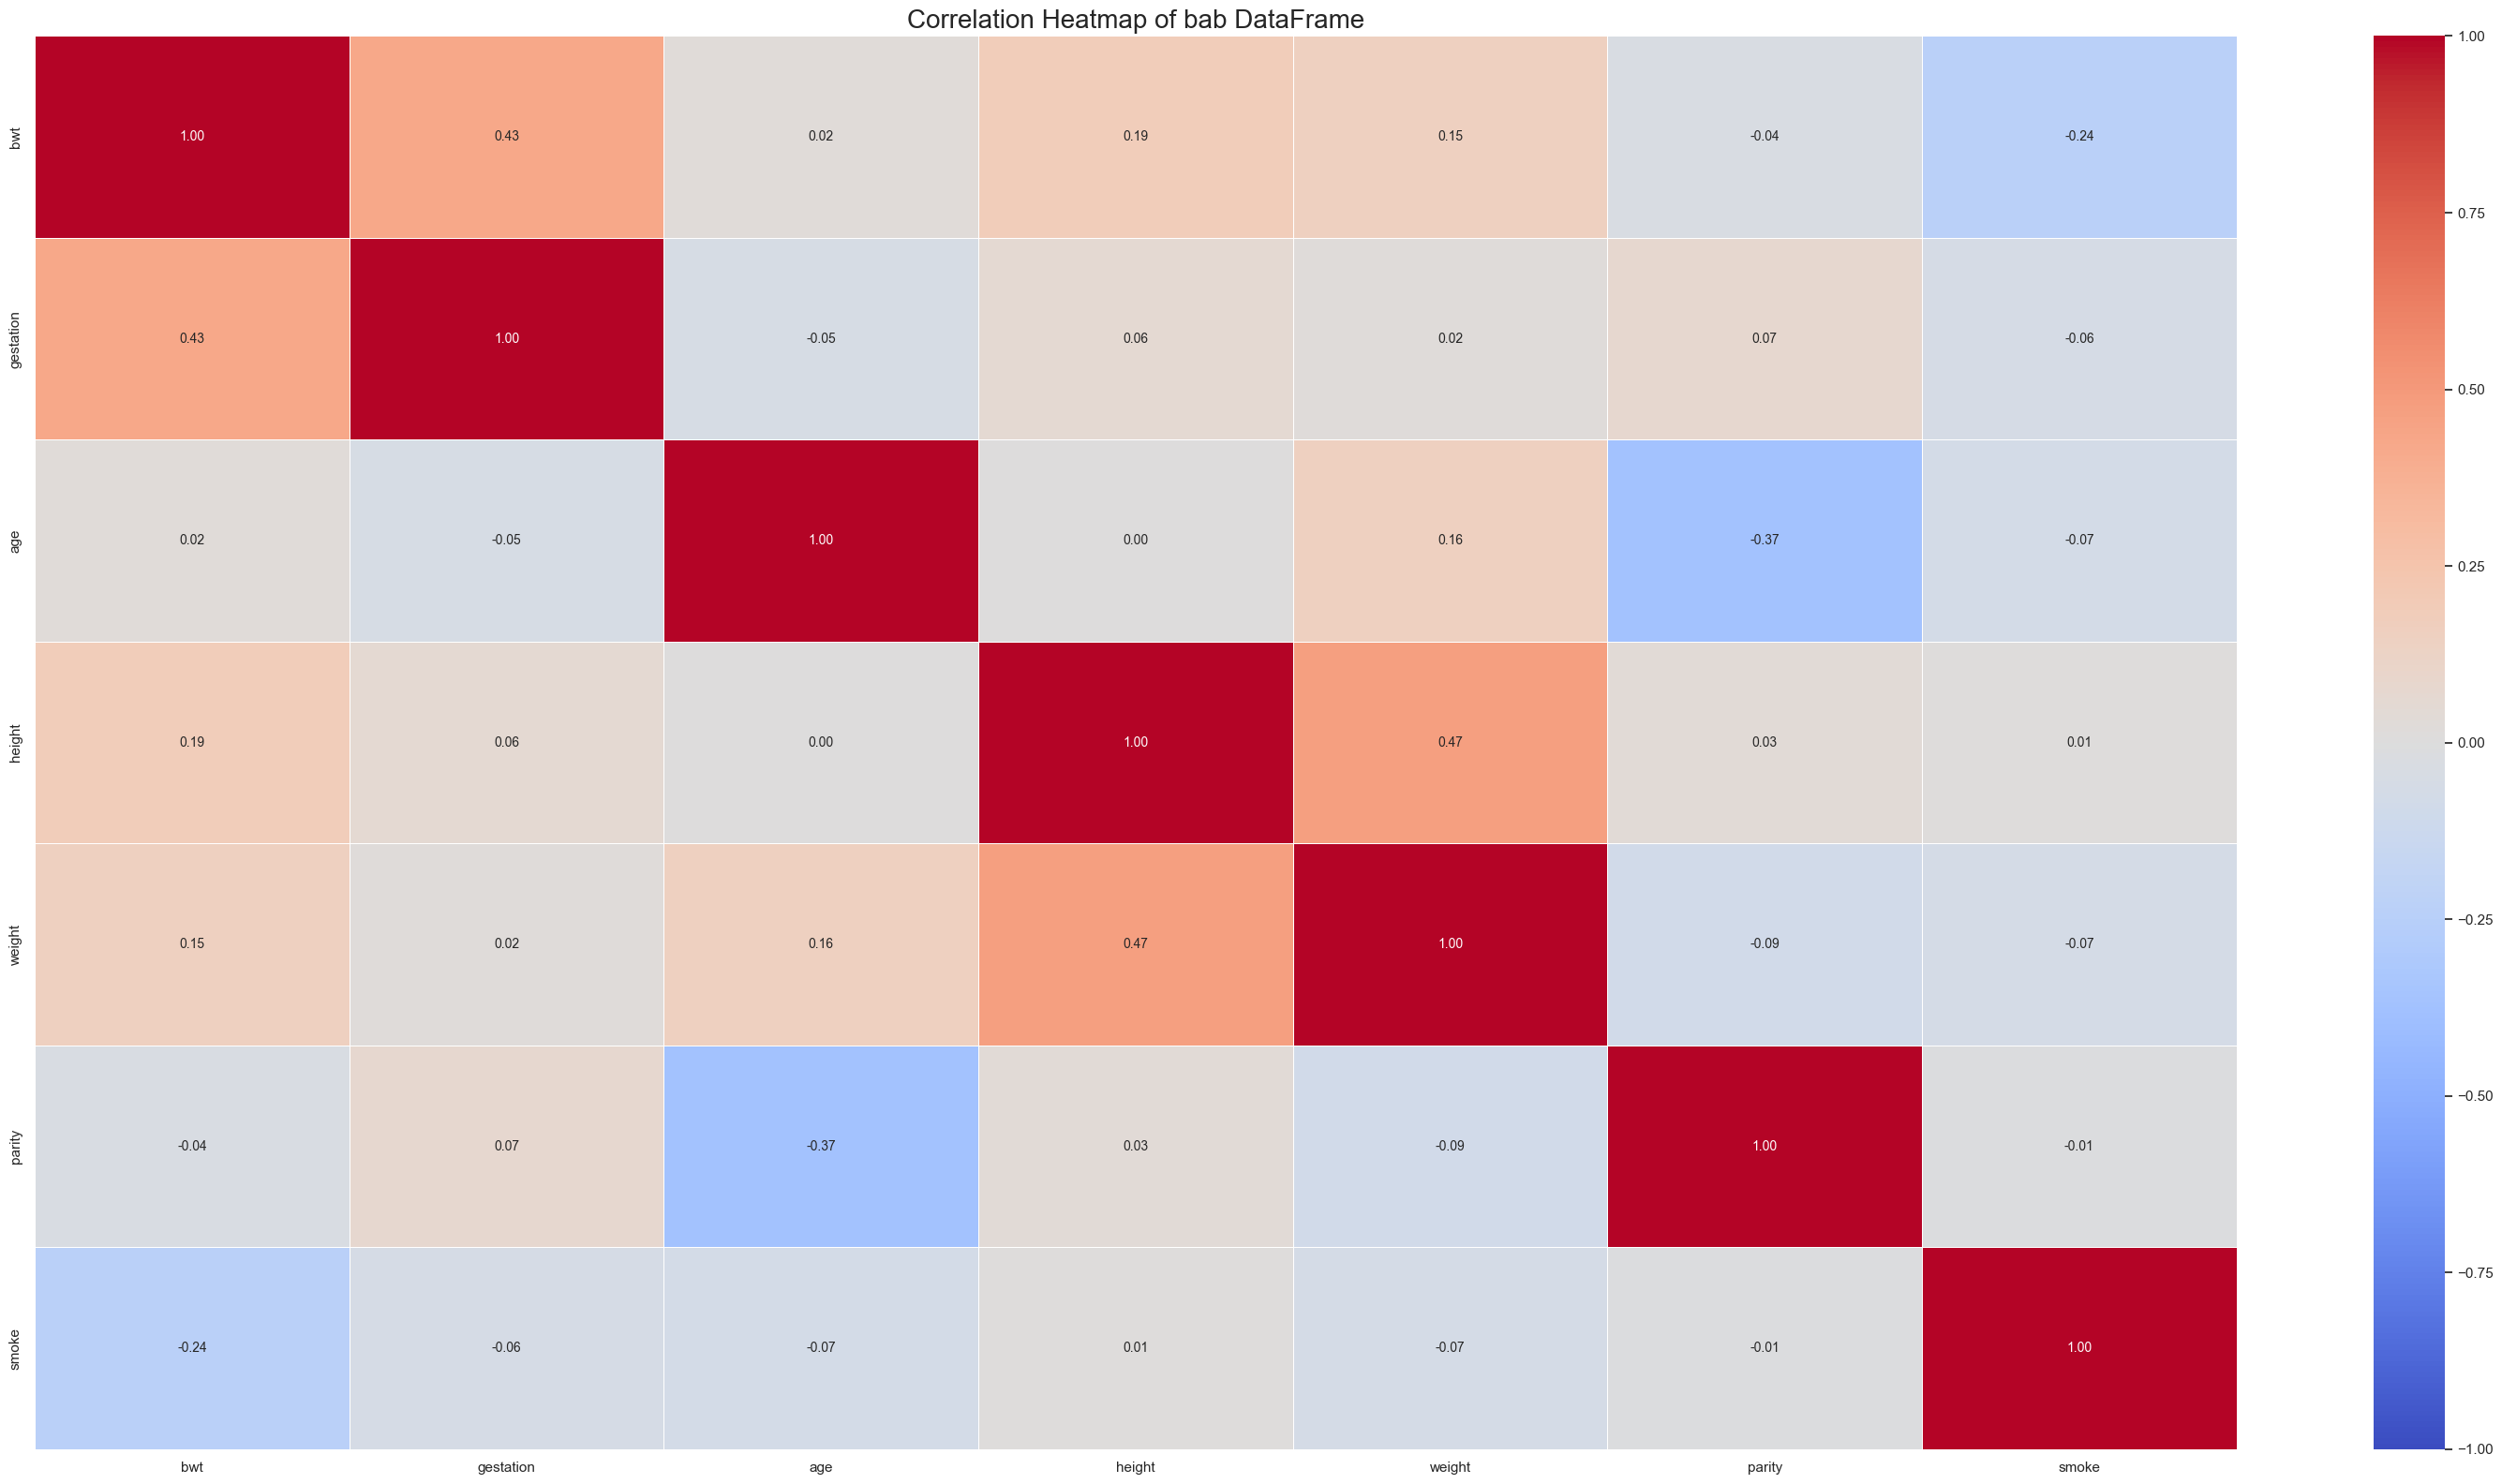

In [77]:

sns.set_theme()
sns.set_palette("coolwarm") 

plt.figure(figsize=(30, 16))
heatmap = sns.heatmap(bab.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)


for text in heatmap.texts:
    text.set_size(10)


plt.title("Correlation Heatmap of bab DataFrame", fontsize=20)


plt.tight_layout()


plt.show()


**pie chart** 

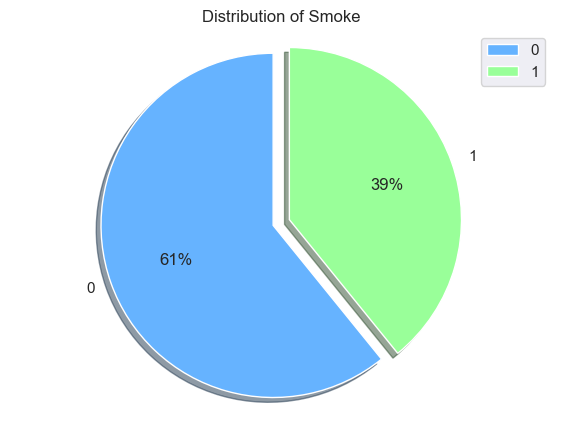

In [78]:
plt.figure(figsize=(7,5))
colors = ['#66b3ff', '#99ff99']  
explode = (0.1, 0)  
ax = bab.value_counts('smoke').plot(kind='pie', autopct='%1.0f%%', startangle=90,colors=colors, explode=explode, shadow=True)
ax.set_title('Distribution of Smoke')
ax.set_ylabel('')
ax.legend(labels=bab['smoke'].value_counts().index, loc='upper right')
ax.axis('equal')
plt.show()


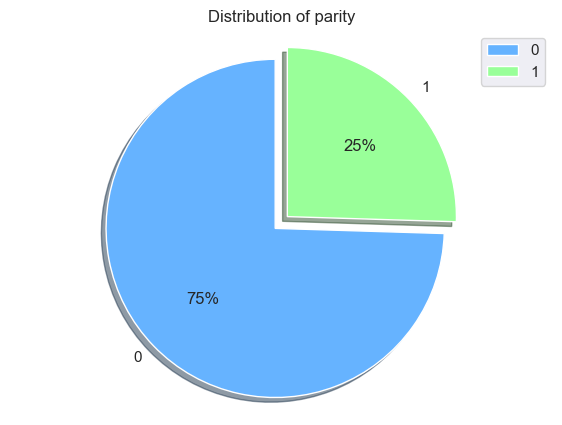

In [79]:
plt.figure(figsize=(7,5))
colors = ['#66b3ff', '#99ff99']  
explode = (0.1, 0)  
ax = bab.value_counts('parity').plot(kind='pie', autopct='%1.0f%%', startangle=90,colors=colors, explode=explode, shadow=True)
ax.set_title('Distribution of parity')
ax.set_ylabel('')
ax.legend(labels=bab['parity'].value_counts().index, loc='upper right')
ax.axis('equal')
plt.show()

**scatter matrix to see realtion between two varaible**

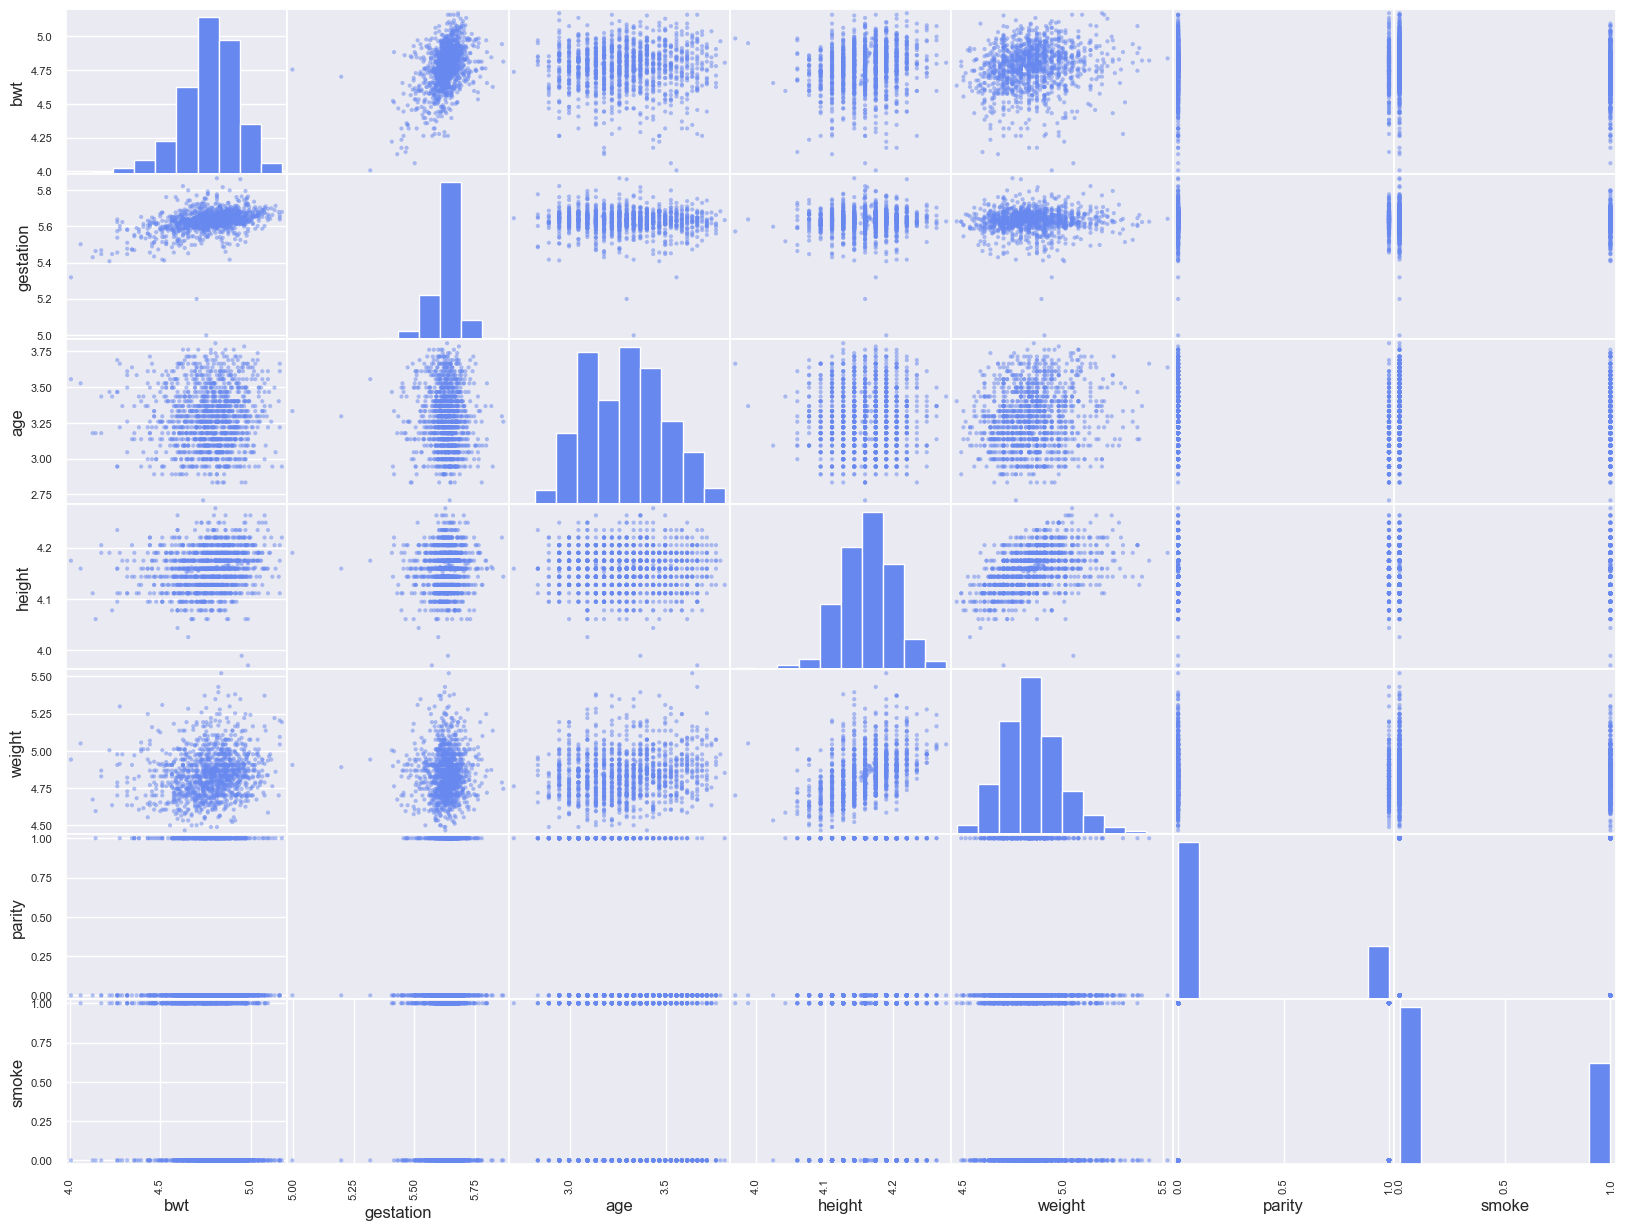

In [80]:
pd.plotting.scatter_matrix(bab,figsize=(20,15),diagonal="hist")
plt.show()

**BoxPlot**


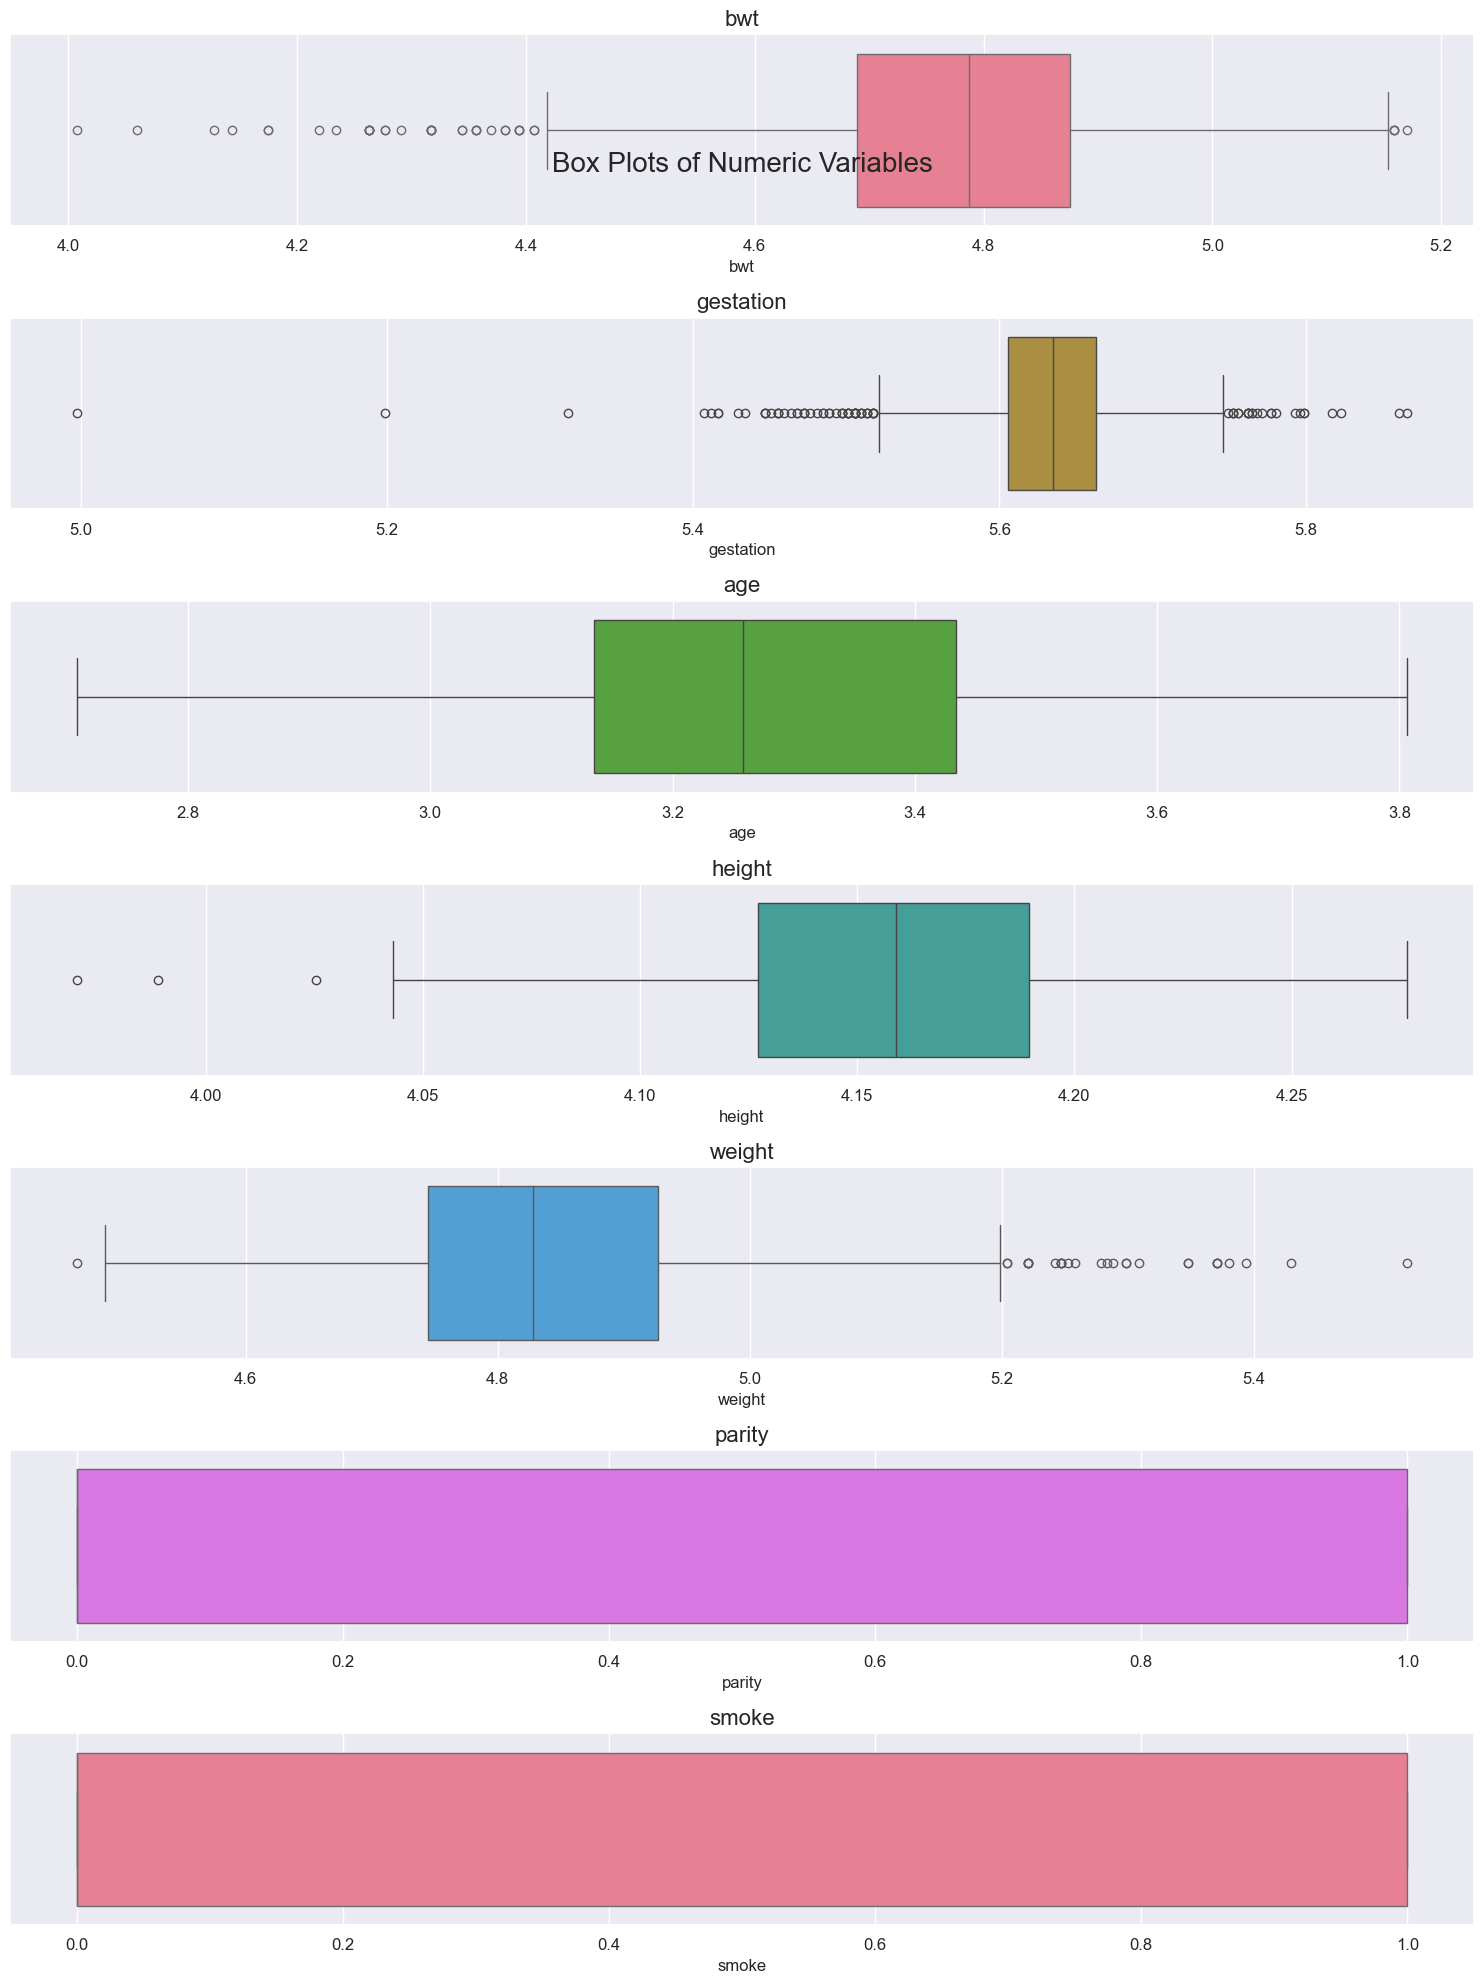

In [81]:

fig, axes = plt.subplots(nrows=len(bab.columns), figsize=(15, 20), sharex=False)


sns.set(style="whitegrid")

# Define a color palette for the box plots
custom_palette = sns.color_palette("husl")

for i, column in enumerate(bab.columns):
    sns.boxplot(x=bab[column], ax=axes[i], color=custom_palette[i % len(custom_palette)])
    axes[i].set_title(column, fontsize=16)
    axes[i].tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Box Plots of Numeric Variables", y=0.92, fontsize=20)
plt.show()


**Histogram for each varible**

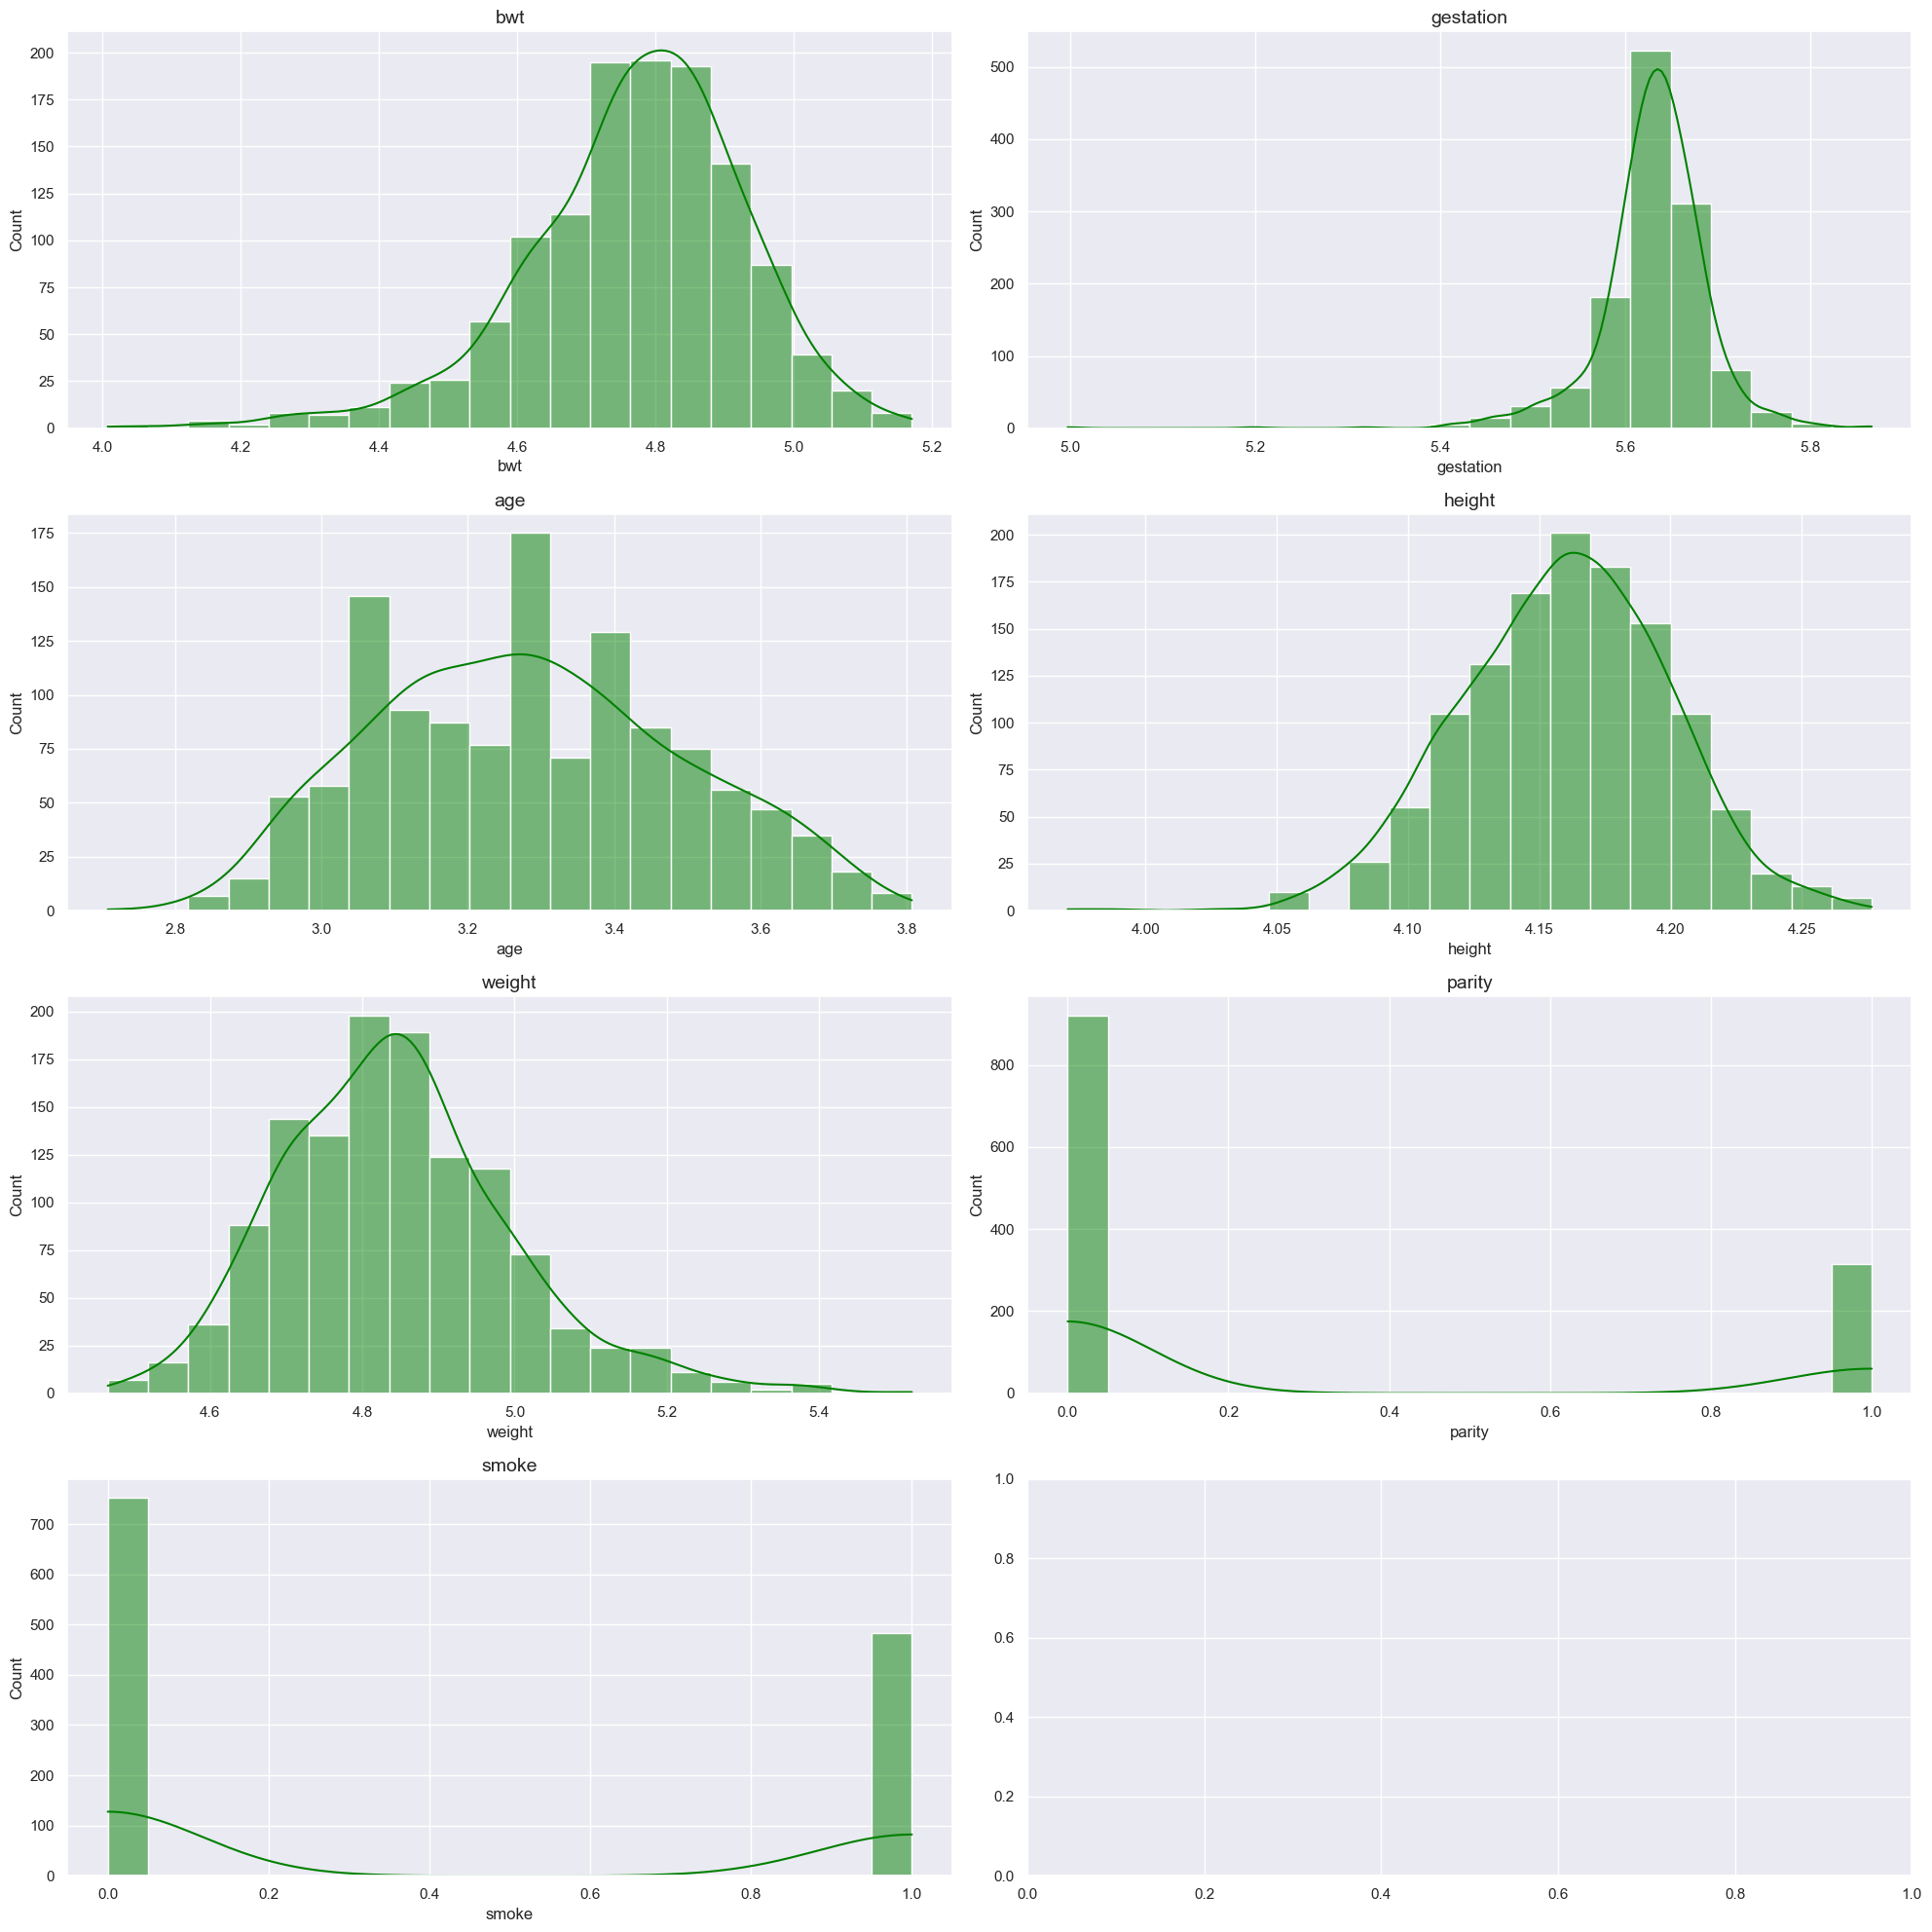

In [82]:

sns.set_theme()
sns.set_palette("pastel")  

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create histograms
for i, column in enumerate(bab.columns):
    sns.histplot(bab[column], ax=axes[i], kde=True, color='green', bins=20)
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##**multipyle linear regression**

**H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

alpha = 0.05**

In [83]:
bab_model = smf.ols('(bwt) ~ age + gestation + weight + height',data =bab).fit()
bab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     85.25
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           5.86e-64
Time:                        19:40:12   Log-Likelihood:                 661.54
No. Observations:                1236   AIC:                            -1313.
Df Residuals:                    1231   BIC:                            -1287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2103      0.571     -7.372      0.000      -5.331      -3.090
age            0.0254      0.020      1.283      0.200      -0.013       0.064
gestation      1.1345      0.068     16.641      0.000       1.001       1.268
weight         0.0876      0.031      2.861      0.004       0.028       0.148
height         0.5017      0.117      4.294      0.000       0.272       0.731
==============================================================================
Omnibus:                       55.861   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.005
Skew:                          -0.386   Prob(JB):                     2.11e-19
Kurtosis:                       4.037   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject H0 ,age accept H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [84]:
bmb_hetro = ssd.het_breuschpagan(bab_model.resid,bab_model.model.exog)
bmb_hetro_test_statistic, bmb_hetro_p_value = bmb_hetro[:2]
bmb_hetro_test_statistic, bmb_hetro_p_value

(107.18832188232055, 2.893995401616934e-22)

## **weighted least square bab_model_weight**

In [85]:
waight =1/(bab_model.resid**2)
bab_model_weight = smf.wls('(bwt) ~ age + gestation + weight + height',data=bab,weights=waight).fit()
bab_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.978e+05
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:12   Log-Likelihood:                 1531.0
No. Observations:                1236   AIC:                            -3052.
Df Residuals:                    1231   BIC:                            -3026.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2268      0.019   -220.232      0.000      -4.264      -4.189
age            0.0252      0.001     20.168      0.000       0.023       0.028
gestation      1.1348      0.002    666.563      0.000       1.131       1.138
weight         0.0861      0.002     48.370      0.000       0.083       0.090
height         0.5071      0.006     88.545      0.000       0.496       0.518
==============================================================================
Omnibus:                     4668.638   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.910
Skew:                          -0.171   Prob(JB):                     3.19e-45
Kurtosis:                       1.035   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**All Reject H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [86]:
bmbww_hetro = ssd.het_breuschpagan(bab_model_weight.resid,bab_model_weight.model.exog)
bmbww_hetro_test_statistic, bmbww_hetro_p_value = bmbww_hetro[:2]
bmbww_hetro_test_statistic, bmbww_hetro_p_value

(107.23976957030139, 2.82182903132245e-22)

**to show assumption**

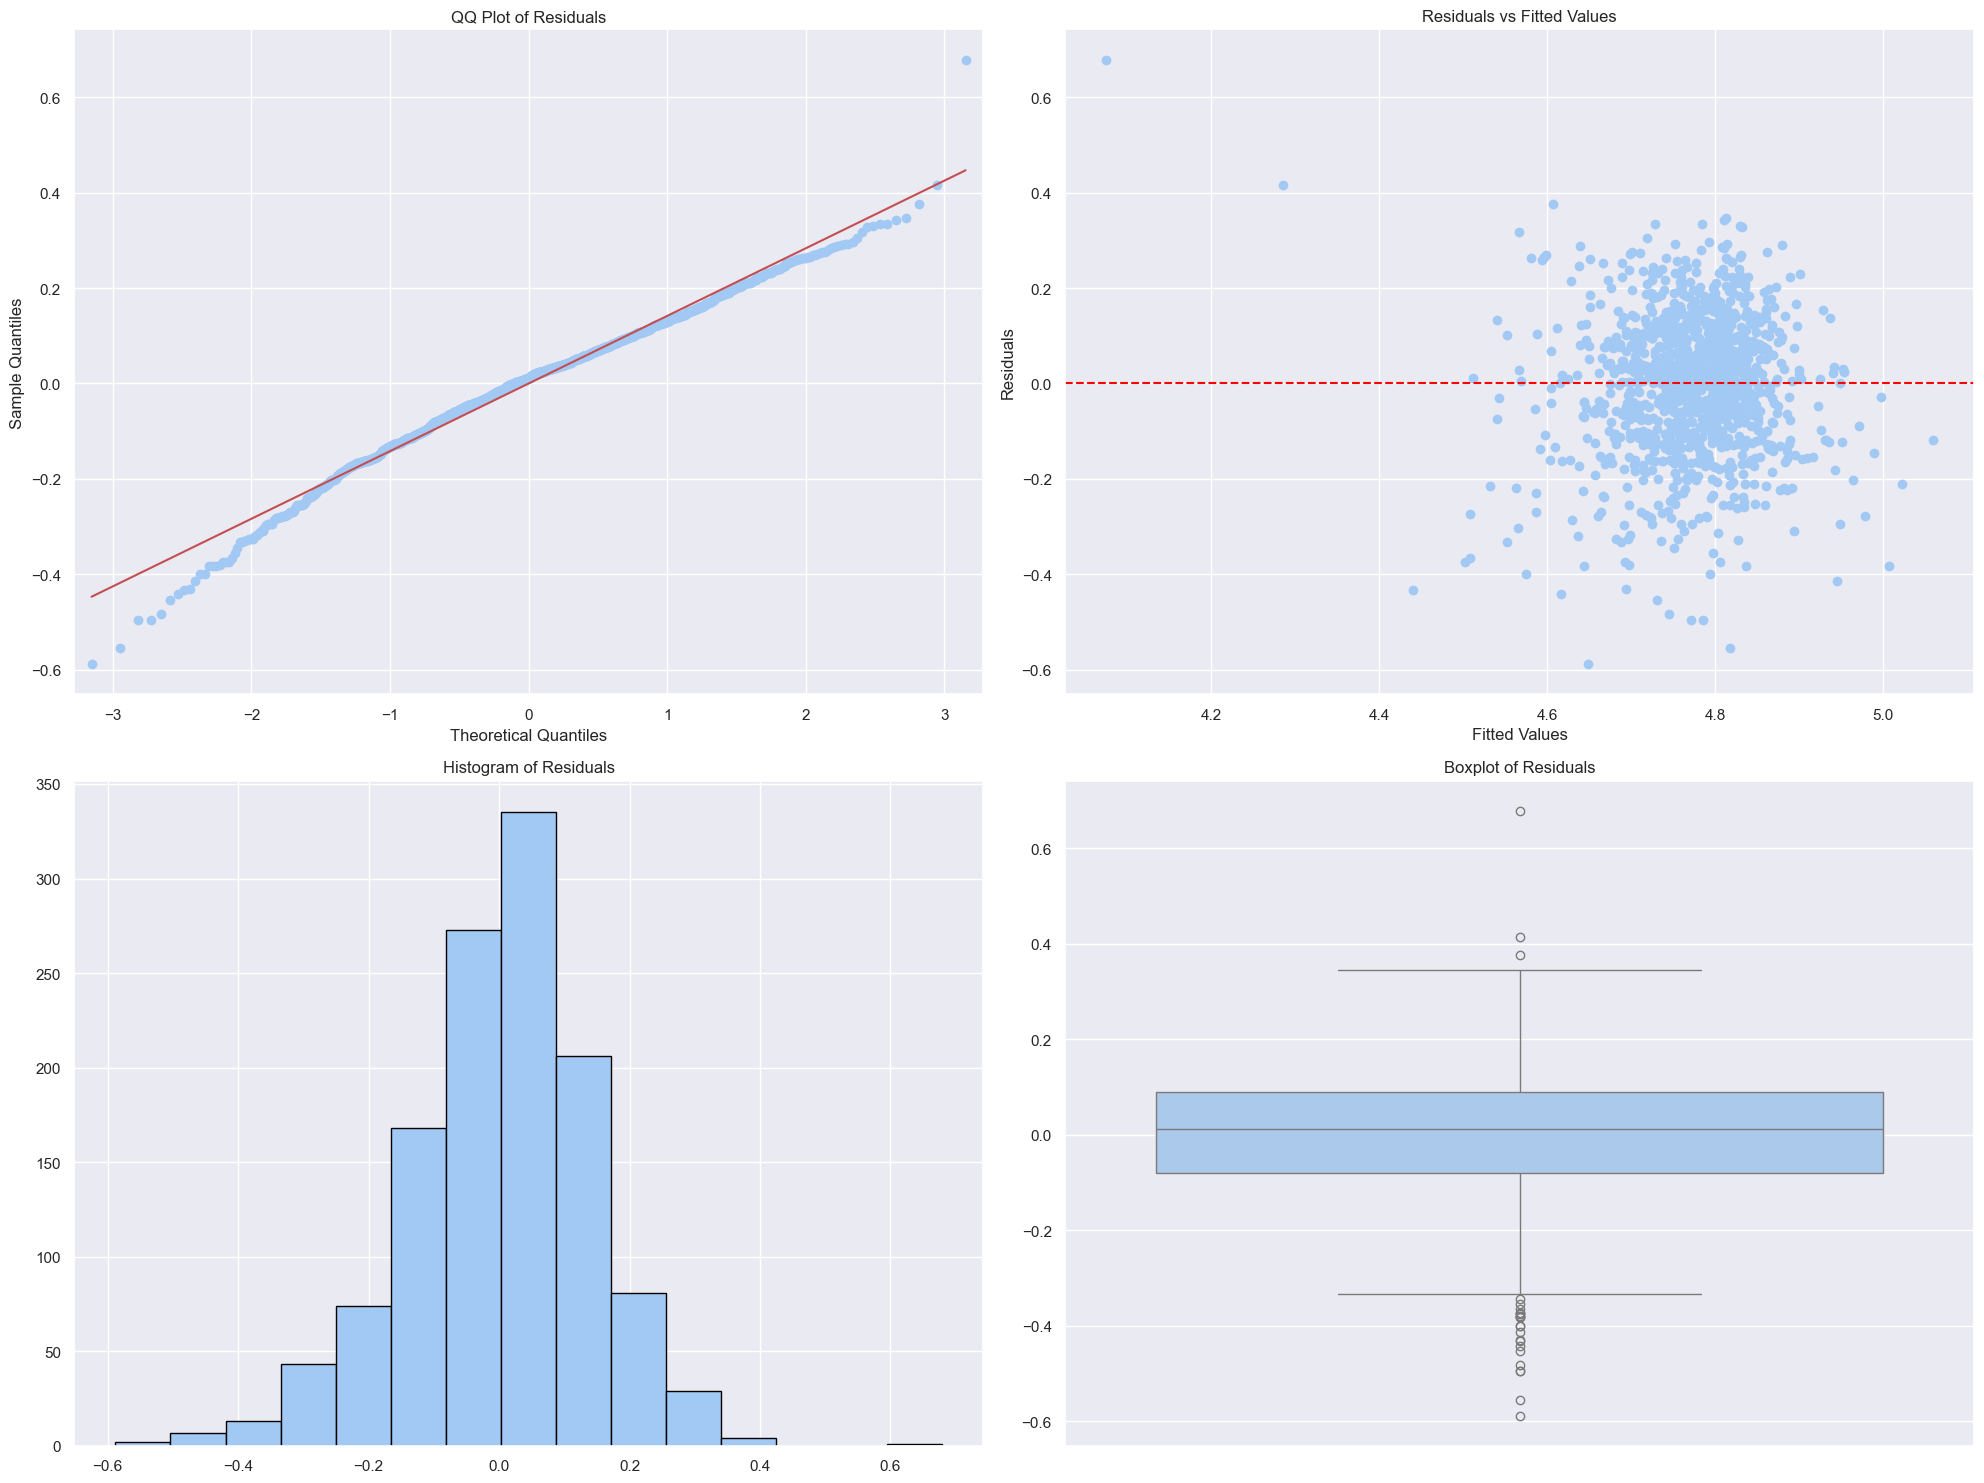

In [87]:
residuals = bab_model_weight.resid
fitted = bab_model_weight.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

In [88]:
bab.columns

Index(['bwt', 'gestation', 'age', 'height', 'weight', 'parity', 'smoke'], dtype='object')

**remove outlier**

In [89]:
quantiles = bab.quantile([0.1, 0.9])
low = quantiles.loc[0.1]
high = quantiles.loc[0.9]

df = bab[(bab >= low) & (bab <= high)]


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        998 non-null    float64
 1   gestation  997 non-null    float64
 2   age        1052 non-null   float64
 3   height     1047 non-null   float64
 4   weight     1004 non-null   float64
 5   parity     1236 non-null   int64  
 6   smoke      1236 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 67.7 KB


In [91]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   float64
 1   gestation  1236 non-null   float64
 2   age        1236 non-null   float64
 3   height     1236 non-null   float64
 4   weight     1236 non-null   float64
 5   parity     1236 non-null   int64  
 6   smoke      1236 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 67.7 KB


**we make multiple imputaion for variable that have missing**

In [92]:
imputer = IterativeImputer()
fit_imput = imputer.fit_transform(df)
cdf = pd.DataFrame(fit_imput, columns = df.columns)

**BoxPlot after Outlier and impute**

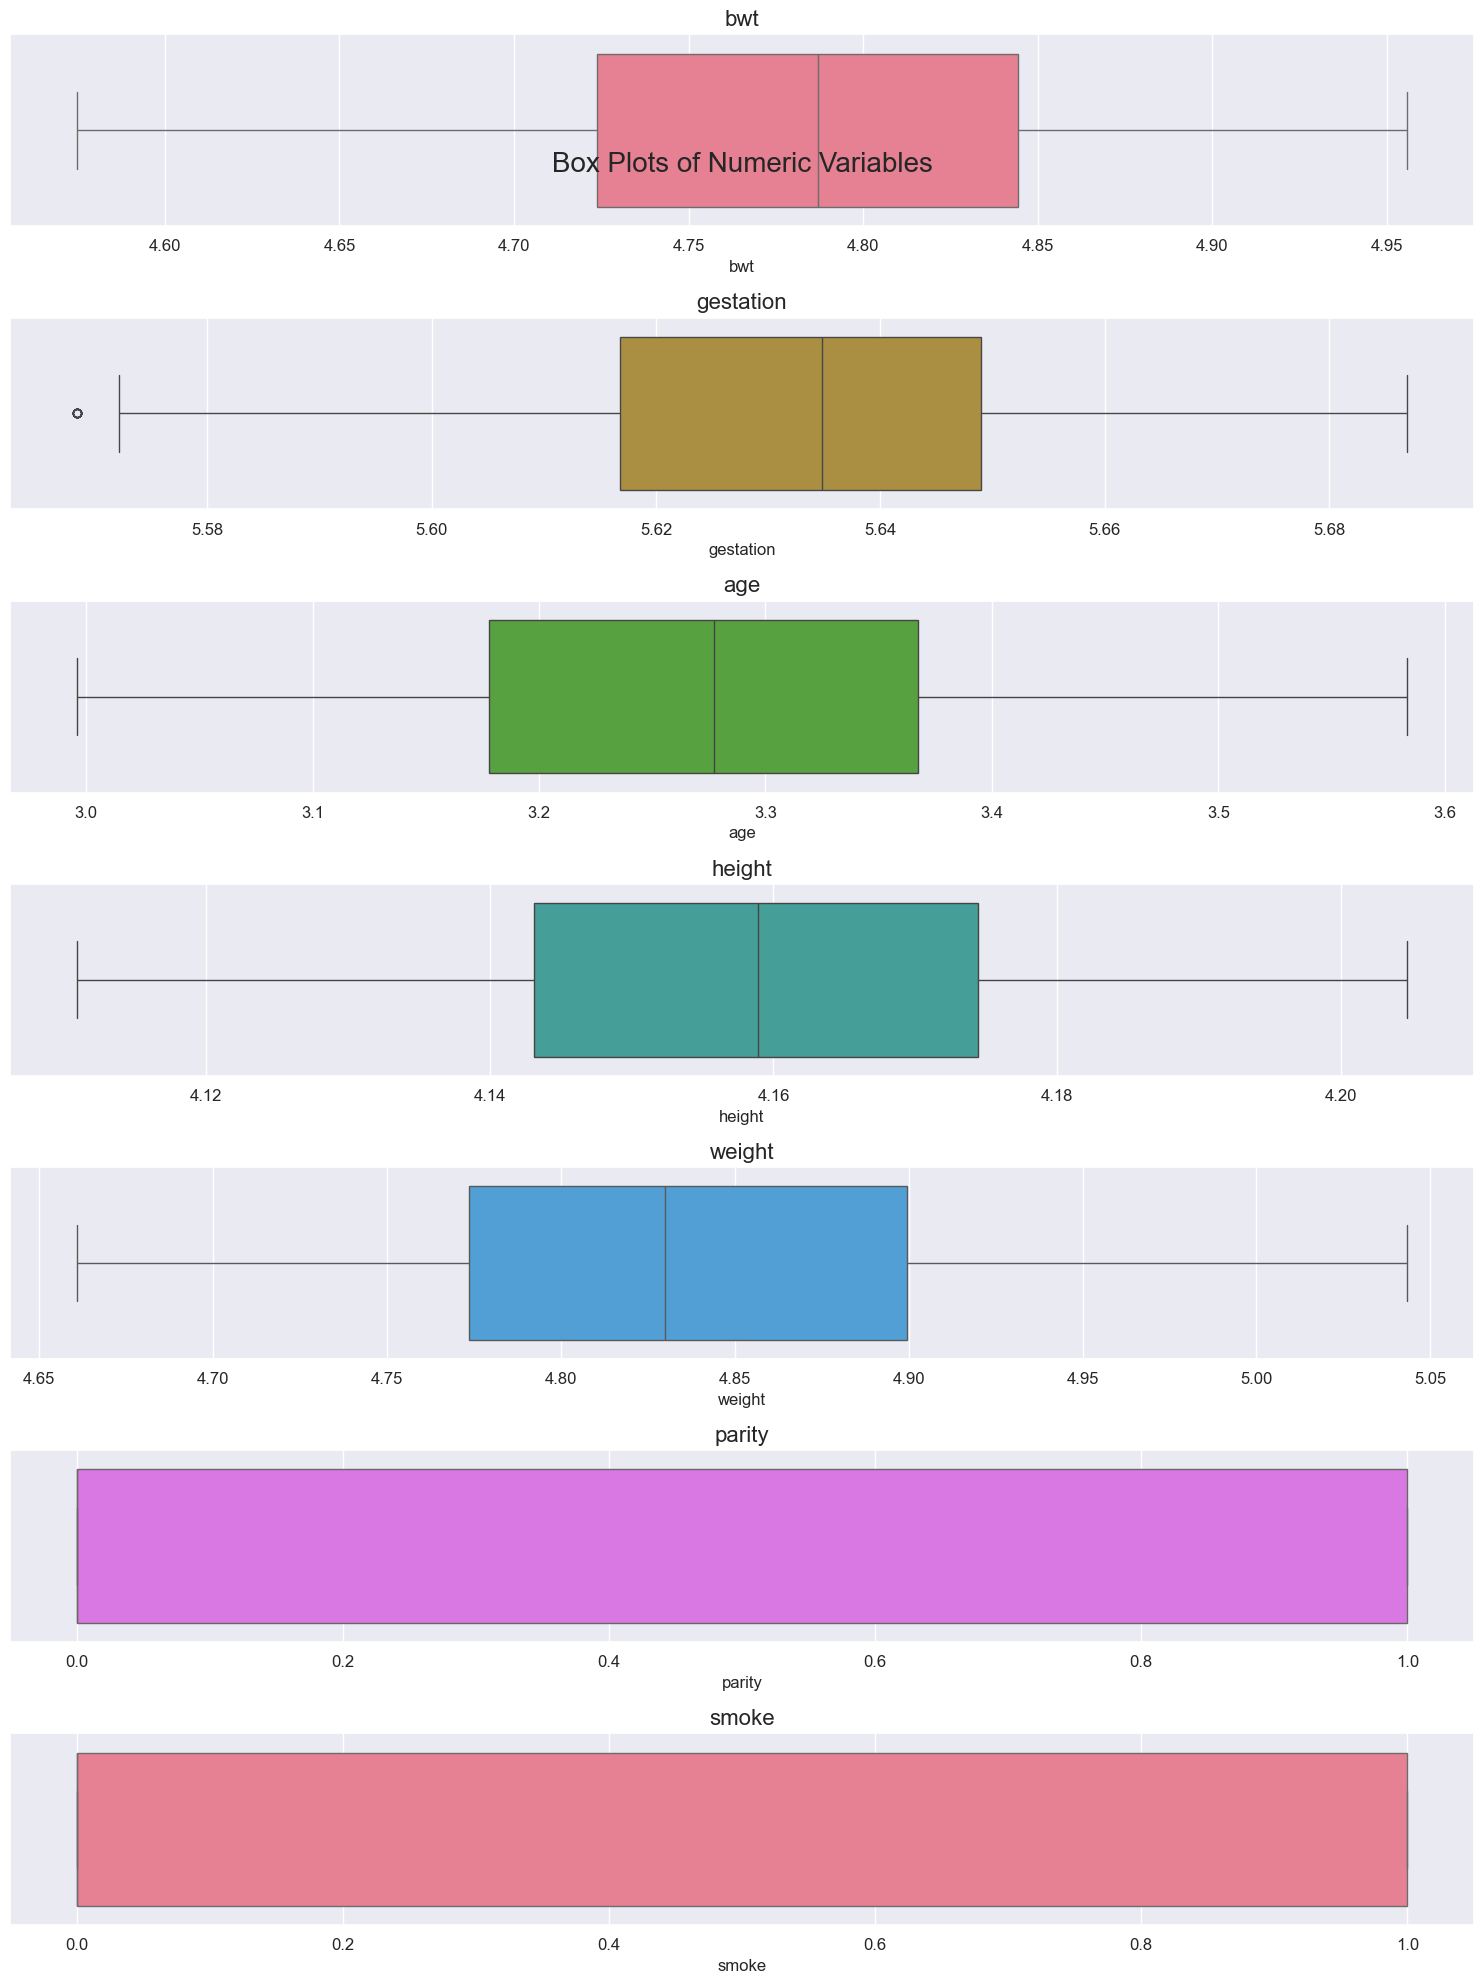

In [93]:

fig, axes = plt.subplots(nrows=len(cdf.columns), figsize=(15, 20), sharex=False)


sns.set(style="whitegrid")

# Define a color palette for the box plots
custom_palette = sns.color_palette("husl")

for i, column in enumerate(bab.columns):
    sns.boxplot(x=cdf[column], ax=axes[i], color=custom_palette[i % len(custom_palette)])
    axes[i].set_title(column, fontsize=16)
    axes[i].tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Box Plots of Numeric Variables", y=0.92, fontsize=20)
plt.show()

In [94]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   float64
 1   gestation  1236 non-null   float64
 2   age        1236 non-null   float64
 3   height     1236 non-null   float64
 4   weight     1236 non-null   float64
 5   parity     1236 non-null   float64
 6   smoke      1236 non-null   float64
dtypes: float64(7)
memory usage: 67.7 KB


**we make cbab_model after outlier**

In [95]:
cbab_model = smf.ols('(bwt) ~ age + gestation + weight + height',data =cdf).fit()
cbab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     54.93
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.19e-42
Time:                        19:40:14   Log-Likelihood:                 1321.2
No. Observations:                1236   AIC:                            -2632.
Df Residuals:                    1231   BIC:                            -2607.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9218      0.616     -6.362      0.000      -5.131      -2.712
age            0.0233      0.016      1.455      0.146      -0.008       0.055
gestation      1.1086      0.091     12.176      0.000       0.930       1.287
weight         0.1058      0.029      3.599      0.000       0.048       0.163
height         0.4491      0.099      4.529      0.000       0.255       0.644
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.134
Skew:                          -0.226   Prob(JB):                      0.00382
Kurtosis:                       2.893   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject  H0 except age accept H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [96]:
bibaf_hetro = ssd.het_breuschpagan(cbab_model.resid,cbab_model.model.exog)
bibaf_hetro_test_statistic, bibaf_hetro_p_value = bibaf_hetro[:2]
bibaf_hetro_test_statistic, bibaf_hetro_p_value

(5.70649144103303, 0.22216612123537832)

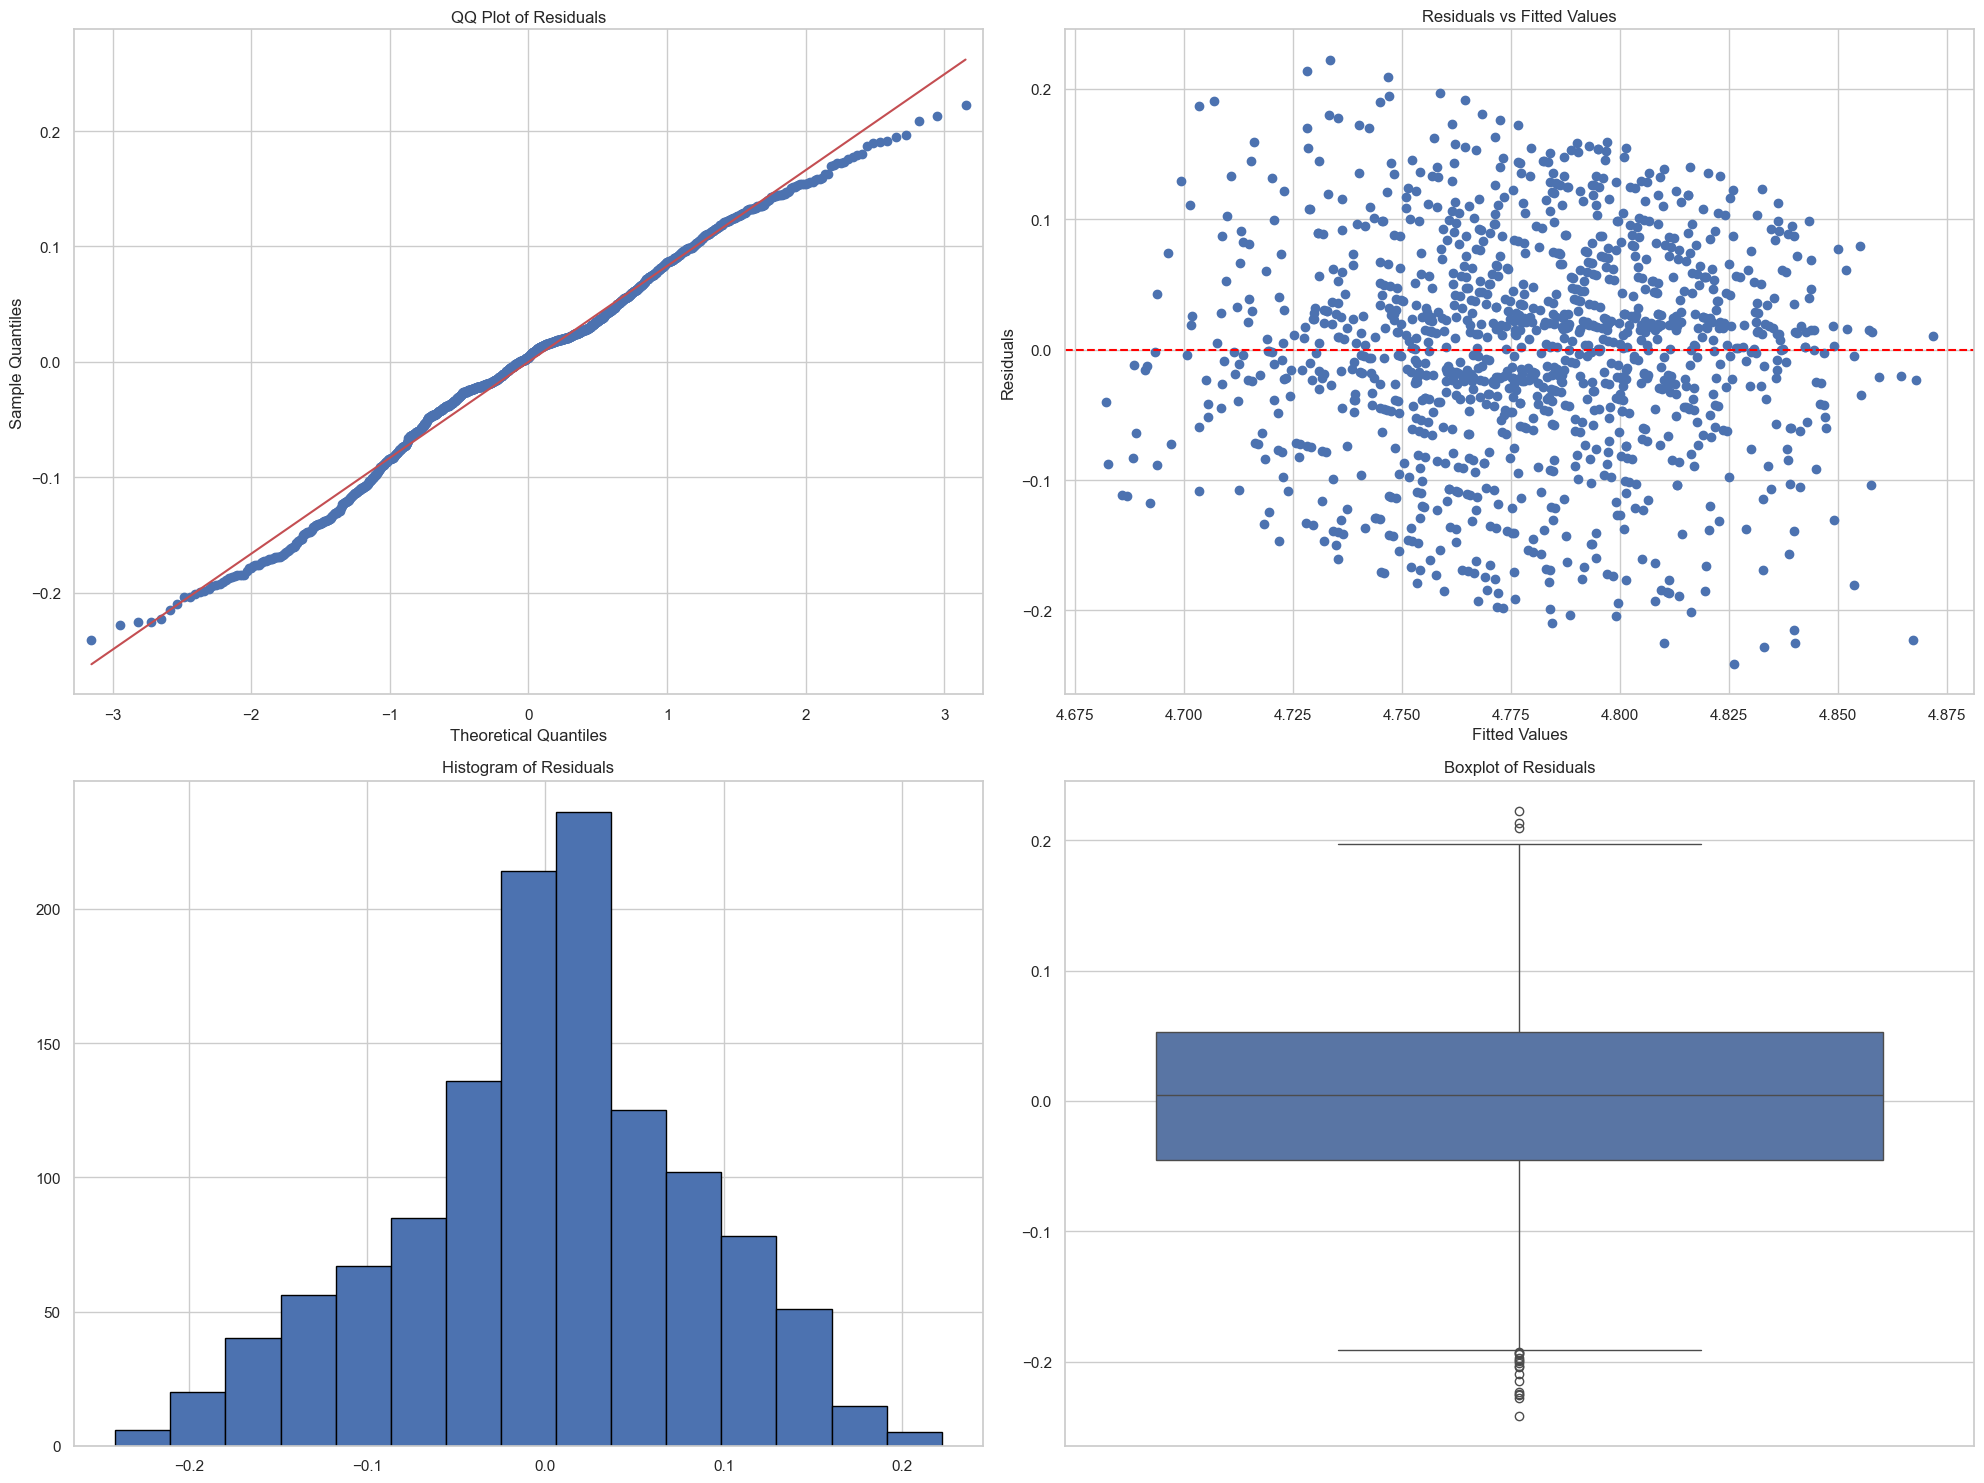

In [97]:
residuals = cbab_model.resid
fitted = cbab_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**Weight least square after outlier**

In [98]:
waight =1/(cbab_model.resid**2)
cdf_model_weight = smf.wls('(bwt) ~ age + gestation + weight + height',data=cdf,weights=waight).fit()
cdf_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.988
Model:                            WLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:15   Log-Likelihood:                 2193.3
No. Observations:                1236   AIC:                            -4377.
Df Residuals:                    1231   BIC:                            -4351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9653      0.033   -120.530      0.000      -4.030      -3.901
age            0.0260      0.001     19.837      0.000       0.023       0.029
gestation      1.1126      0.006    174.798      0.000       1.100       1.125
weight         0.1064      0.001     74.315      0.000       0.104       0.109
height         0.4513      0.004    103.787      0.000       0.443       0.460
==============================================================================
Omnibus:                     4633.076   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.273
Skew:                          -0.102   Prob(JB):                     7.24e-45
Kurtosis:                       1.024   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all rejectH0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

Reject H0**

In [99]:
bibwwaf_hetro = ssd.het_breuschpagan(cdf_model_weight.resid,cdf_model_weight.model.exog)
bibwwaf_hetro_test_statistic, bibwwaf_hetro_p_value = bibwwaf_hetro[:2]
bibwwaf_hetro_test_statistic, bibwwaf_hetro_p_value

(5.73702670622447, 0.219666879038615)

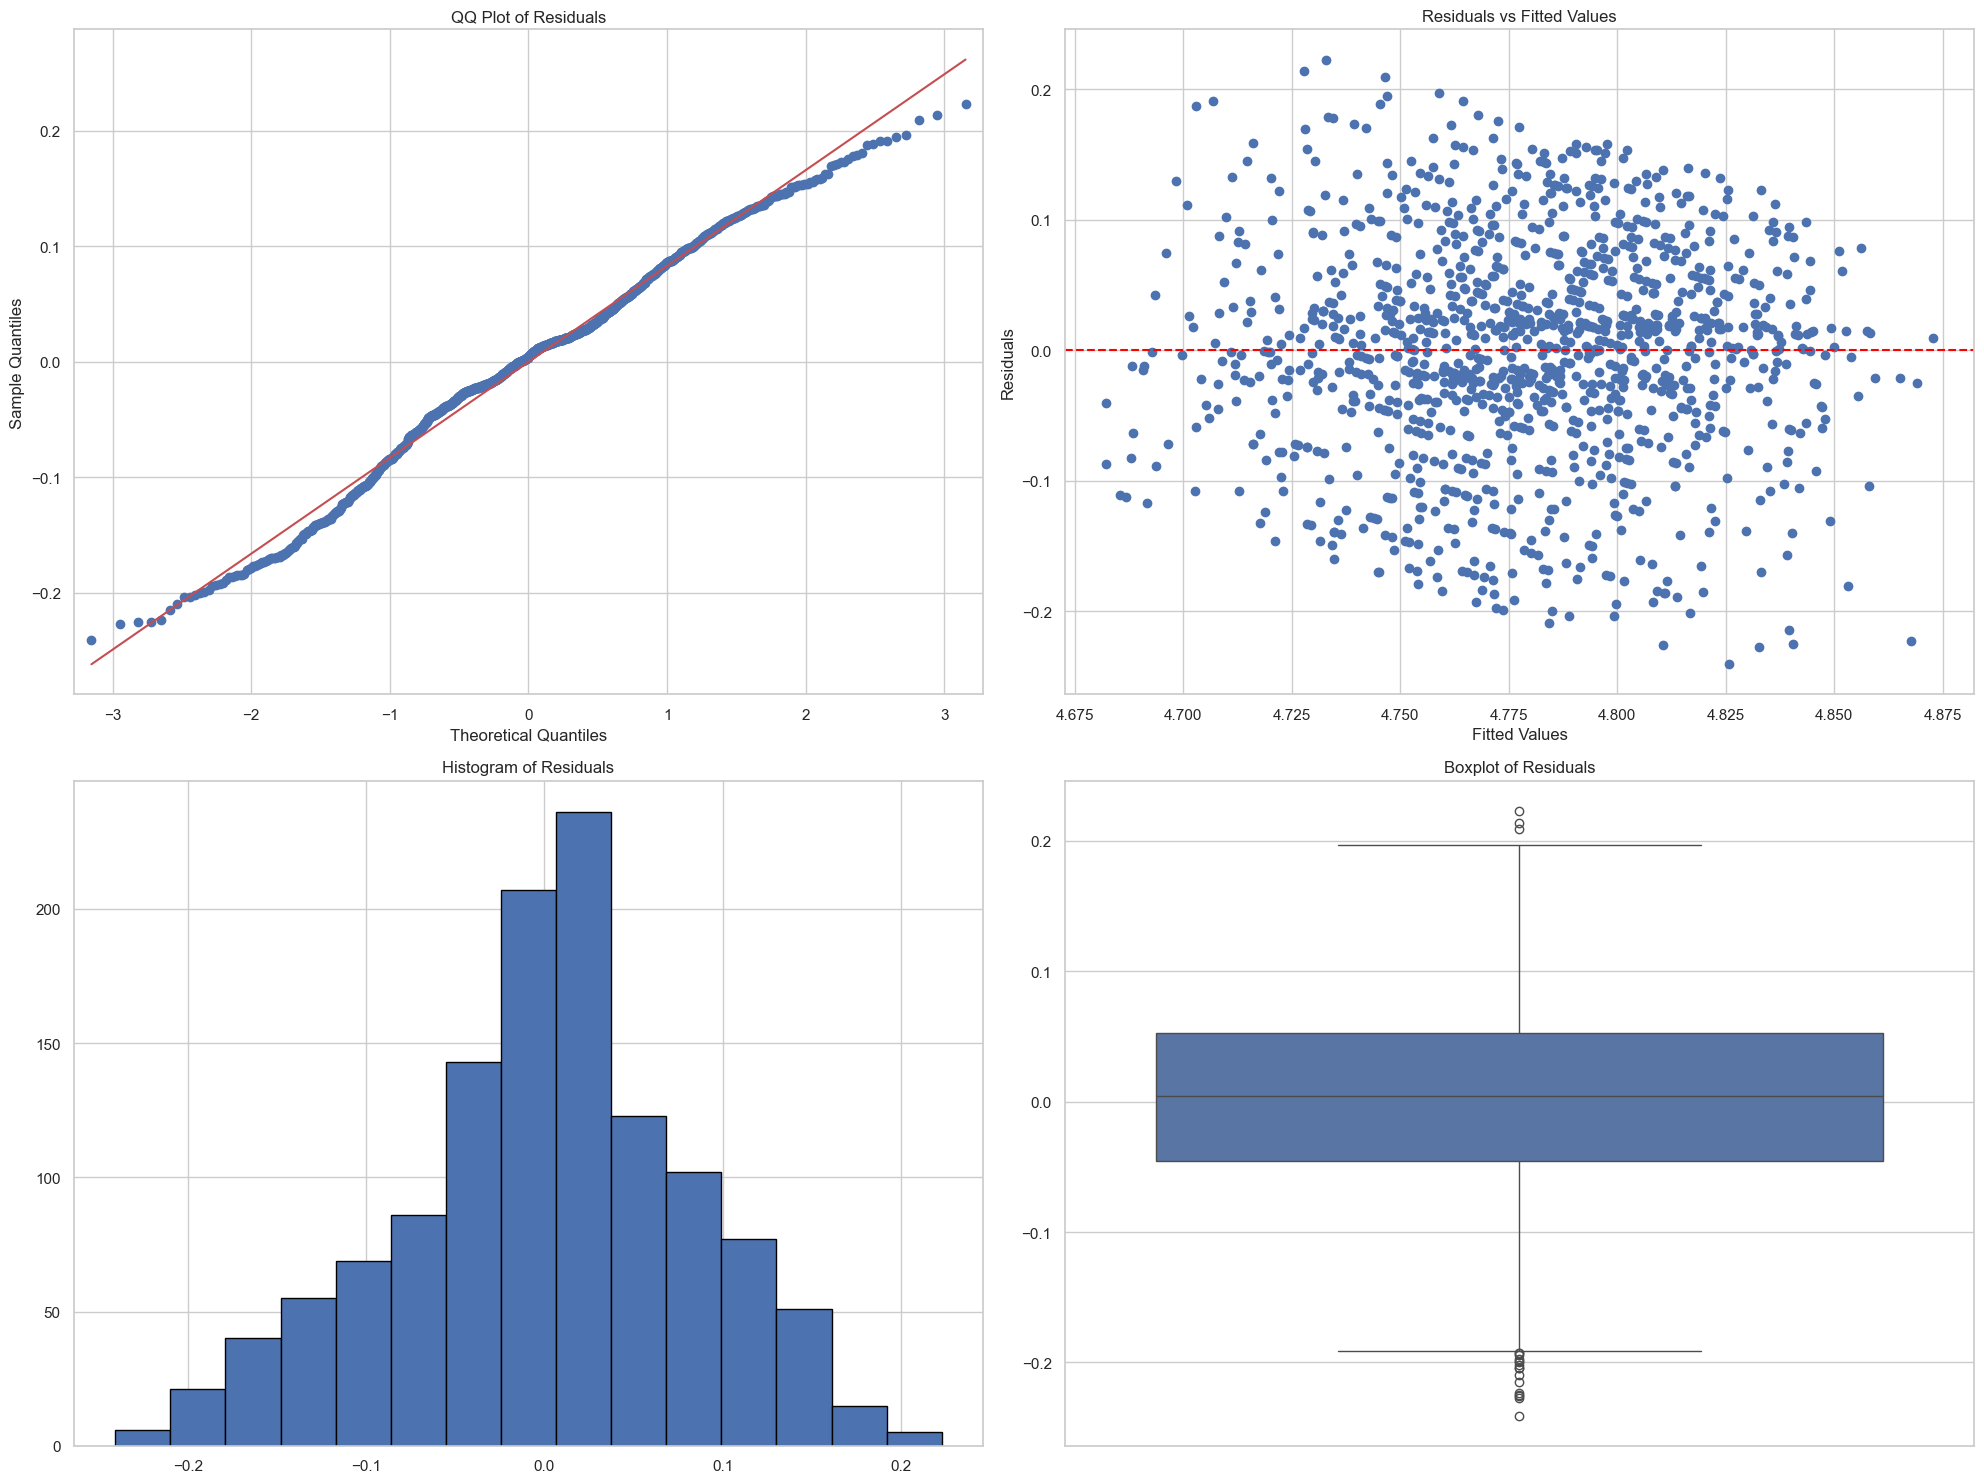

In [100]:
residuals = cdf_model_weight.resid
fitted = cdf_model_weight.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**test without Age**

In [101]:
waight =1/(cbab_model.resid**2)
cdf_model_weight_withoutage = smf.wls('(bwt) ~ gestation + weight + height',data=cdf,weights=waight).fit()
cdf_model_weight_withoutage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.985
Model:                            WLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.610e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:15   Log-Likelihood:                 2021.9
No. Observations:                1236   AIC:                            -4036.
Df Residuals:                    1232   BIC:                            -4015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6506      0.033   -110.305      0.000      -3.716      -3.586
gestation      1.0654      0.007    157.184      0.000       1.052       1.079
weight         0.0934      0.001     63.879      0.000       0.091       0.096
height         0.4750      0.005     98.937      0.000       0.466       0.484
==============================================================================
Omnibus:                       42.391   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.935
Skew:                           0.053   Prob(JB):                     1.34e-24
Kurtosis:                       4.457   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

Reject H0**

In [102]:
bibwwage_hetro = ssd.het_breuschpagan(cdf_model_weight_withoutage.resid,cdf_model_weight_withoutage.model.exog)
bibwwage_hetro_test_statistic, bibwwage_hetro_p_value = bibwwage_hetro[:2]
bibwwage_hetro_test_statistic, bibwwage_hetro_p_value

(5.210367761272021, 0.15702537815839604)

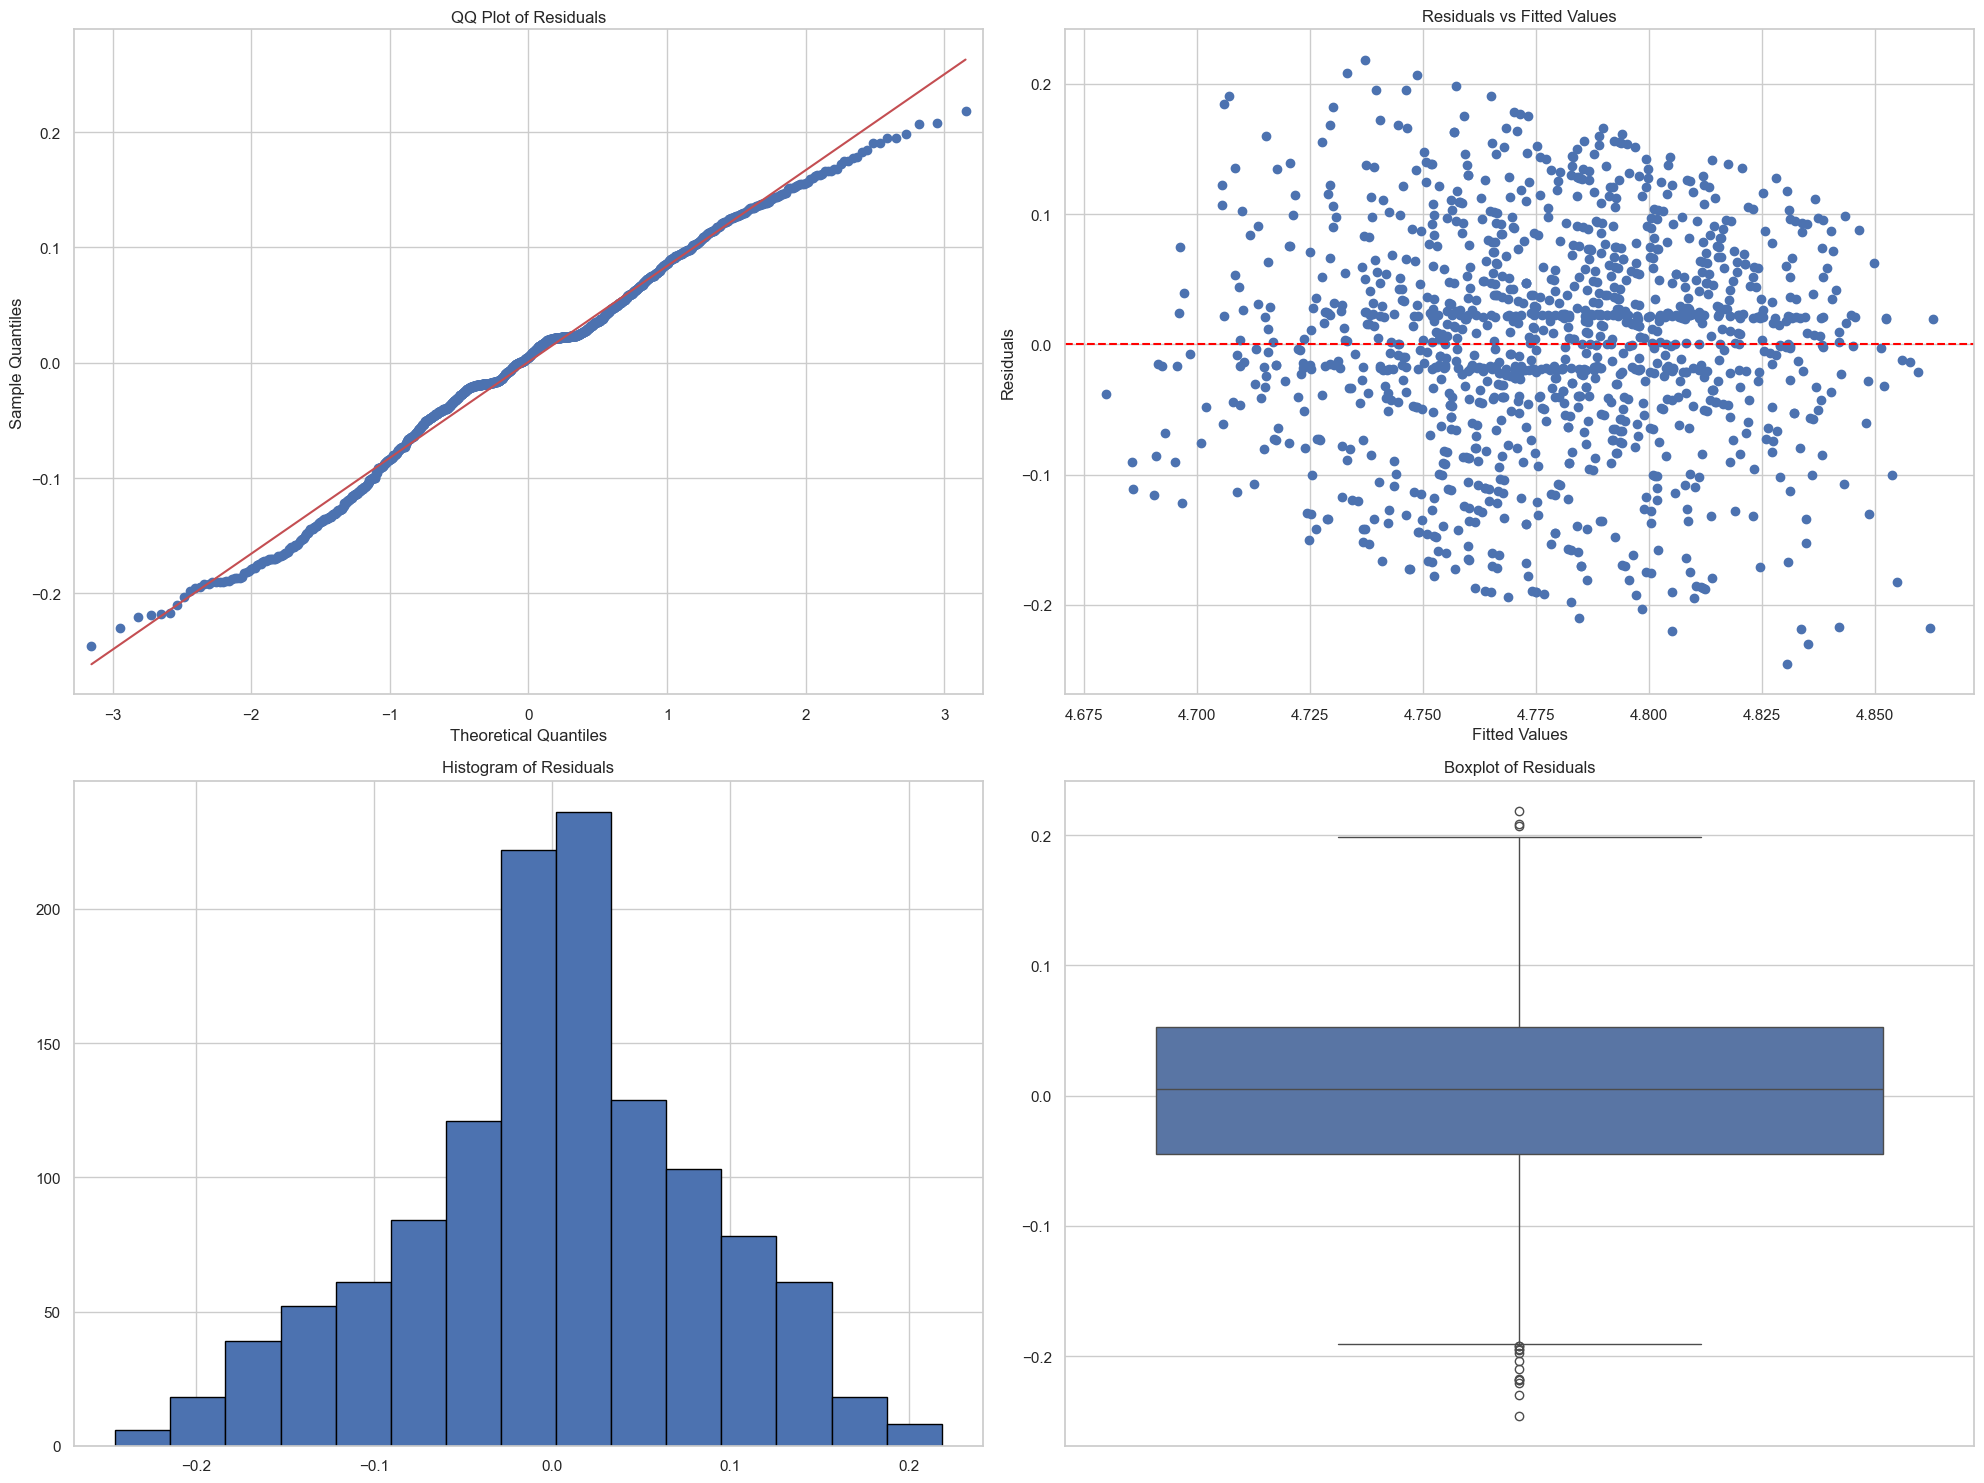

In [103]:
residuals = cdf_model_weight_withoutage.resid
fitted = cdf_model_weight_withoutage.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**all reject except age accept H0**

**scatter matrix after outlier**

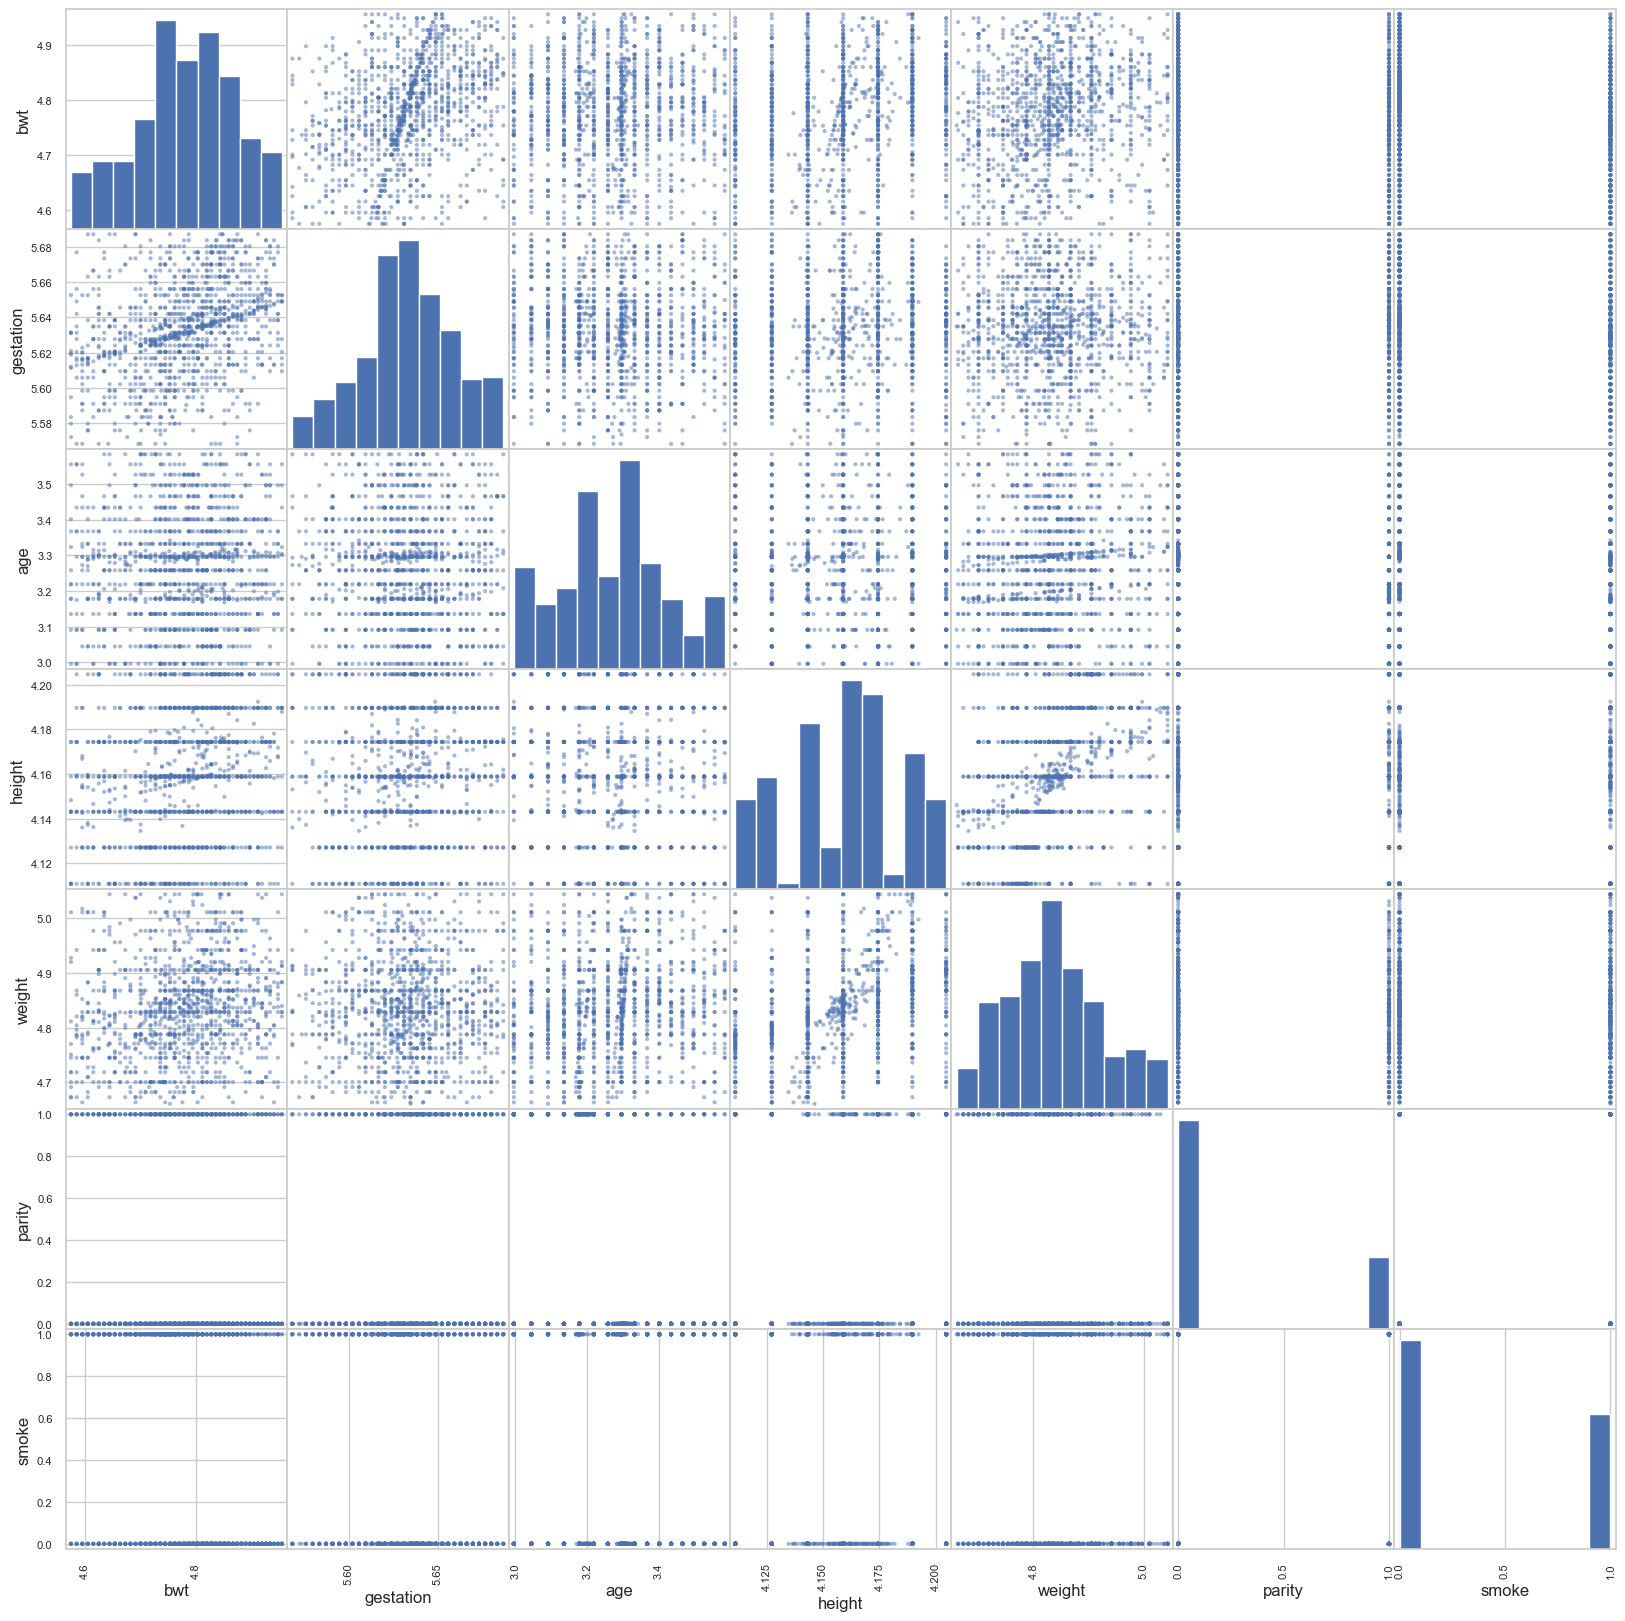

In [104]:
pd.plotting.scatter_matrix(cdf,figsize=(20,20),diagonal="hist")
plt.show()

**line chart for each variable**

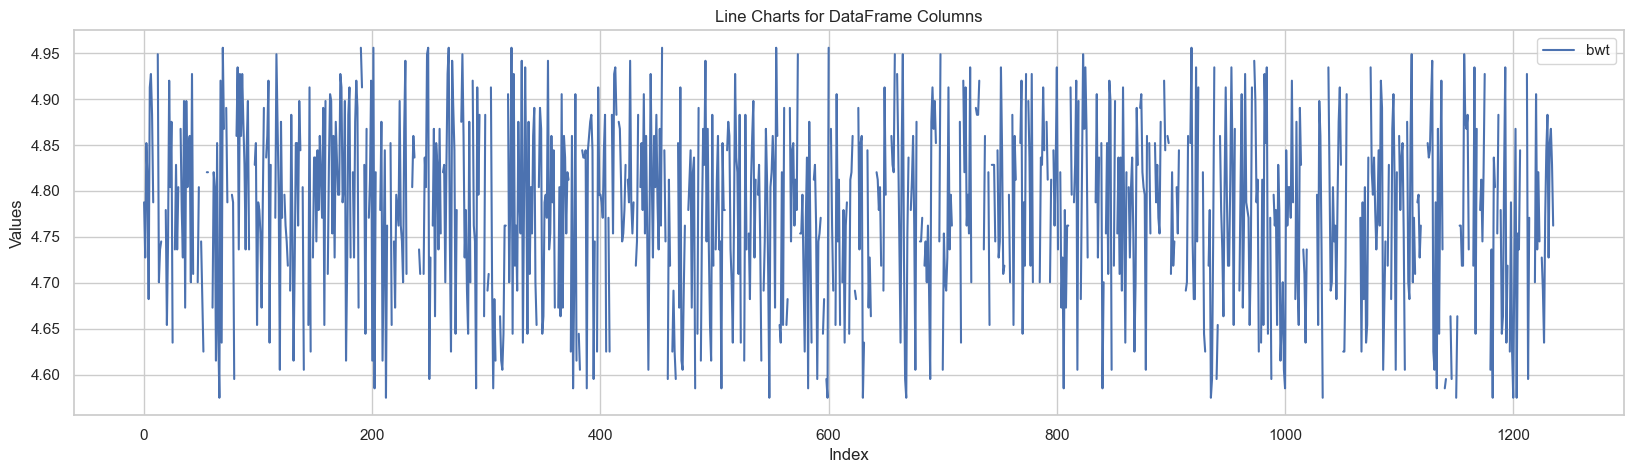

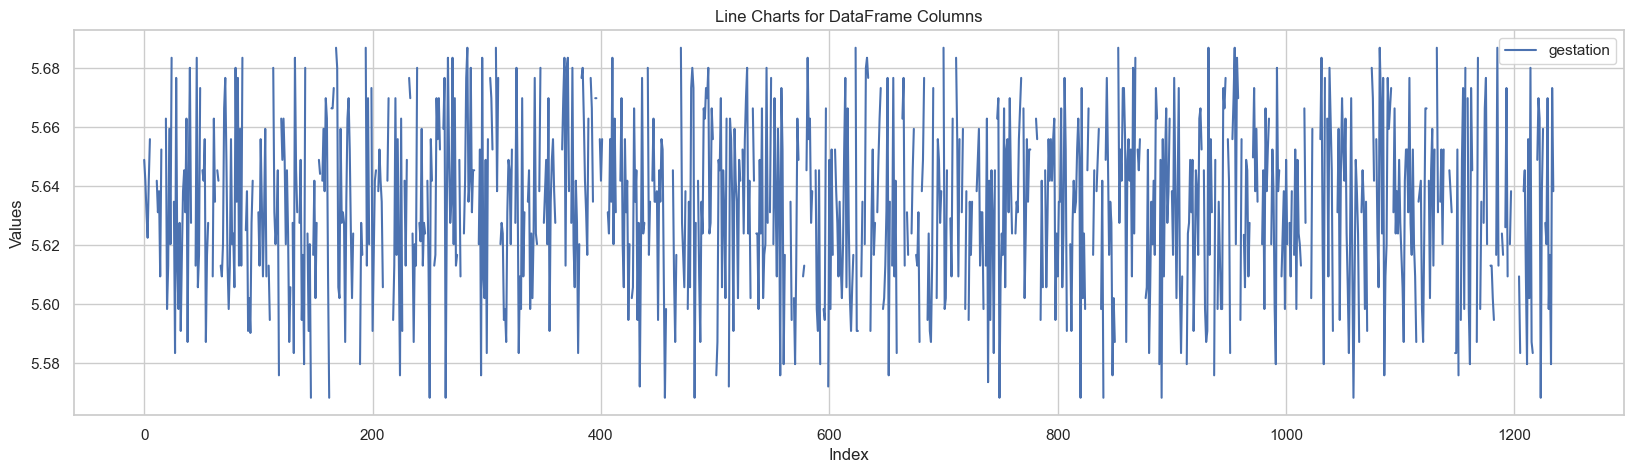

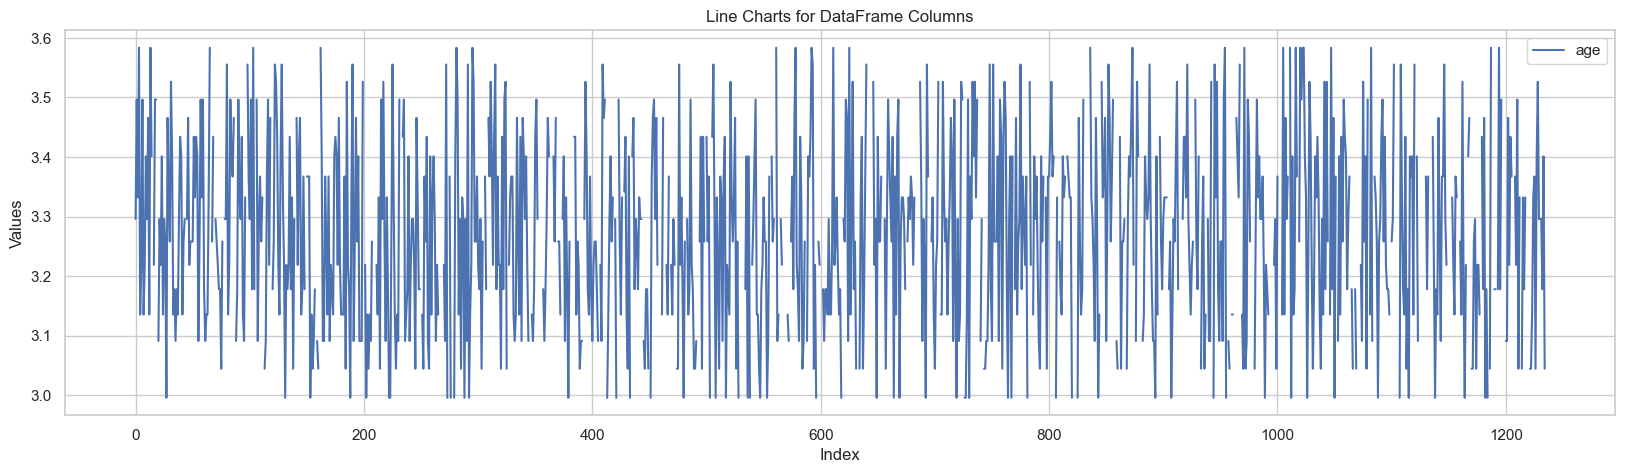

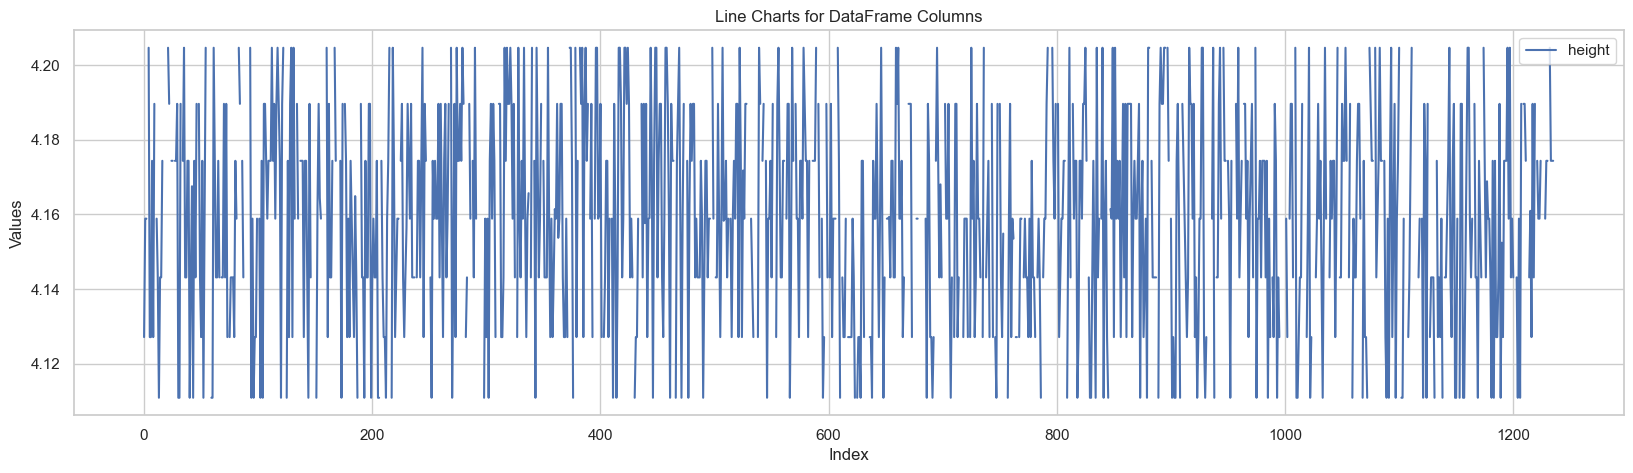

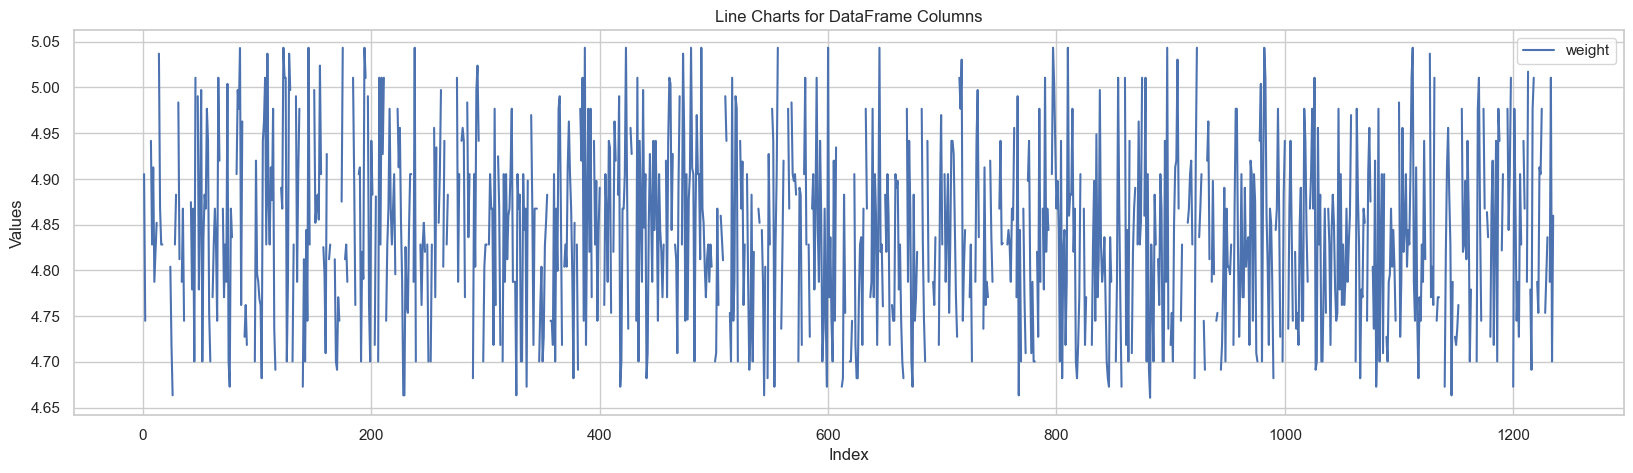

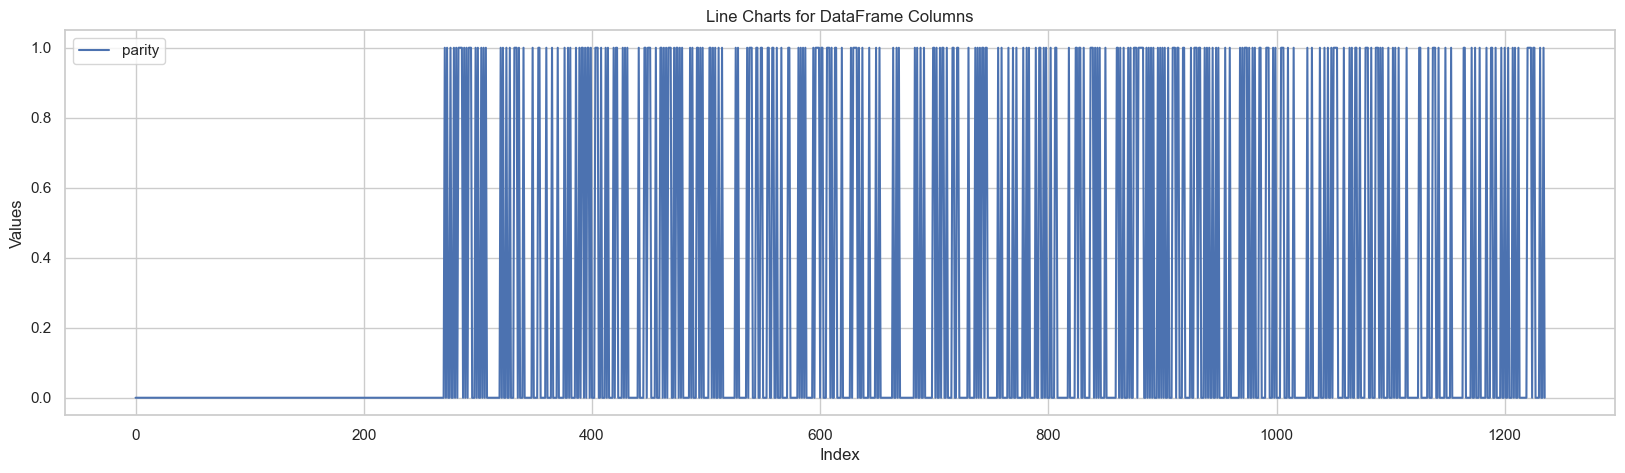

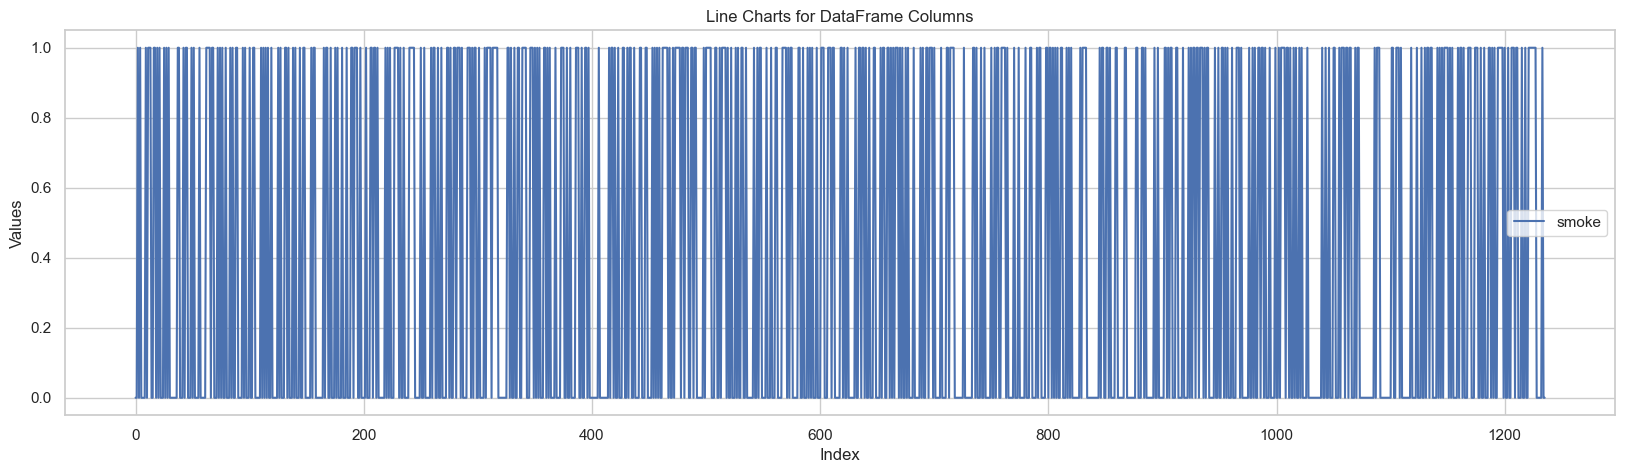

In [105]:


for column in df.columns:
    plt.figure(figsize=(20,5))
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Line Charts for DataFrame Columns')
    plt.legend()
    plt.show()



**stationarity test**

In [106]:
for i in cdf.columns:
    test =adfuller(cdf[i])
    print(test[0:2])

(-34.9014565897187, 0.0)
(-21.412343969762823, 0.0)
(-17.621118681748897, 3.838193005054726e-30)
(-25.083894900428195, 0.0)
(-24.79702513755696, 0.0)
(-5.401475040840921, 3.36312456935009e-06)
(-36.288736504291386, 0.0)


# **logistic reggression**

In [107]:
bab_model2 = smf.logit('(parity)~ (age)+(weight)',data=cdf).fit()
bab_model2.summary()

Optimization terminated successfully.
         Current function value: 0.516681
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 parity   No. Observations:                 1236
Model:                          Logit   Df Residuals:                     1233
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                 0.08972
Time:                        19:40:21   Log-Likelihood:                -638.62
converged:                       True   LL-Null:                       -701.56
Covariance Type:            nonrobust   LLR p-value:                 4.614e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.3247      3.981      5.356      0.000      13.521      29.128
age           -5.2441      0.519    -10.101      0.000      -6.262      -4.226
weight        -1.1162      0.780     -1.431      0.152      -2.645       0.413
==============================================================================
"""

In [108]:
parity_model = smf.logit("parity ~ gestation", data = cdf).fit()
parity_model.summary()

Optimization terminated successfully.
         Current function value: 0.563829
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 parity   No. Observations:                 1236
Model:                          Logit   Df Residuals:                     1234
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                0.006653
Time:                        19:40:21   Log-Likelihood:                -696.89
converged:                       True   LL-Null:                       -701.56
Covariance Type:            nonrobust   LLR p-value:                  0.002248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.5681     14.350     -3.106      0.002     -72.693     -16.443
gestation      7.7193      2.546      3.032      0.002       2.729      12.710
==============================================================================
"""

# **Anova**

In [109]:
smoke_modlano = smf.ols("bwt ~ smoke", data = cdf).fit()
smoke_modlano.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     85.08
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.20e-19
Time:                        19:40:21   Log-Likelihood:                 1261.0
No. Observations:                1236   AIC:                            -2518.
Df Residuals:                    1234   BIC:                            -2508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7980      0.003   1507.024      0.000       4.792       4.804
smoke         -0.0469      0.005     -9.224      0.000      -0.057      -0.037
==============================================================================
Omnibus:                       22.937   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.287
Skew:                          -0.256   Prob(JB):                     3.93e-05
Kurtosis:                       2.638   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
av.anova_lm(smoke_modlano)

df    sum_sq   mean_sq          F        PR(>F)
smoke        1.0  0.648545  0.648545  85.082092  1.202803e-19
Residual  1234.0  9.406260  0.007623        NaN           NaN

In [111]:
bwt_anova = smf.ols("bwt ~ smoke +weight" , data = cdf).fit()

In [112]:
bwt_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     60.96
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           5.69e-26
Time:                        19:40:21   Log-Likelihood:                 1278.0
No. Observations:                1236   AIC:                            -2550.
Df Residuals:                    1233   BIC:                            -2535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0150      0.133     30.121      0.000       3.754       4.277
smoke         -0.0459      0.005     -9.143      0.000      -0.056      -0.036
weight         0.1618      0.028      5.876      0.000       0.108       0.216
==============================================================================
Omnibus:                       16.259   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.473
Skew:                          -0.237   Prob(JB):                     0.000437
Kurtosis:                       2.726   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
av.anova_lm(bwt_anova)

df    sum_sq   mean_sq          F        PR(>F)
smoke        1.0  0.648545  0.648545  87.393382  4.039092e-20
weight       1.0  0.256188  0.256188  34.522131  5.415991e-09
Residual  1233.0  9.150071  0.007421        NaN           NaN

In [114]:
bwt_anova = smf.ols("bwt ~ smoke +weight+smoke:weight" , data = cdf).fit()

In [115]:
av.anova_lm(bwt_anova)

df    sum_sq   mean_sq          F        PR(>F)
smoke            1.0  0.648545  0.648545  87.424518  3.984831e-20
weight           1.0  0.256188  0.256188  34.534430  5.383883e-09
smoke:weight     1.0  0.010677  0.010677   1.439274  2.304875e-01
Residual      1232.0  9.139394  0.007418        NaN           NaN

In [116]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=cdf['bwt'],groups=cdf['smoke'],alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.0    1.0  -0.0469   0.0 -0.0569 -0.0369   True
---------------------------------------------------


In [117]:
for i in cdf.columns:
    test =adfuller(cdf[i])
    print(test[0:2])

(-34.9014565897187, 0.0)
(-21.412343969762823, 0.0)
(-17.621118681748897, 3.838193005054726e-30)
(-25.083894900428195, 0.0)
(-24.79702513755696, 0.0)
(-5.401475040840921, 3.36312456935009e-06)
(-36.288736504291386, 0.0)


In [118]:
df_first_diff = cdf.diff()

In [119]:
print(df_first_diff.isnull().sum())

bwt          1
gestation    1
age          1
height       1
weight       1
parity       1
smoke        1
dtype: int64


In [120]:
df_first_diff=df_first_diff.dropna()

In [121]:
print(df_first_diff.isnull().sum())

bwt          0
gestation    0
age          0
height       0
weight       0
parity       0
smoke        0
dtype: int64


In [122]:
for i in df_first_diff.columns:
    test =adfuller(df_first_diff[i])
    print(test[0:2])

(-13.872822070606595, 6.418146448168798e-26)
(-12.599449904649616, 1.7492435803149162e-23)
(-13.141361943053036, 1.4271732490729154e-24)
(-12.2345595320091, 1.0352138449527491e-22)
(-15.925884769769677, 7.828485404189162e-29)
(-14.143680218295682, 2.2232953489488007e-26)
(-14.7880975162883, 2.192598720103753e-27)


In [123]:
df_second_diff = df_first_diff.diff()

In [124]:
df_second_diff=df_second_diff.dropna()

In [125]:
for i in df_second_diff.columns:
    test =adfuller(df_second_diff[i])
    print(test[0:2])

(-16.6499138487741, 1.6073778437894496e-29)
(-15.43382373474774, 2.9247883405264146e-28)
(-16.377134430341457, 2.774144700333838e-29)
(-15.278548914909132, 4.611734073186389e-28)
(-15.61124591190266, 1.7787046841662362e-28)
(-16.06023524002358, 5.649348055804563e-29)
(-16.453106522041107, 2.368200398722271e-29)
